MPOX OUTBREAK EDA

In [67]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [64]:
#Import MPox daily data
mpox_daily = pd.read_csv('Data/mpox-daily-confirmed-cases world wide.csv')
mpox_daily.shape

(997, 3)

Overview of MPox worldwide since 2022

In [4]:
mpox_daily.head()

,Country,Day,Daily cases
0,World,2022-05-01,0.57
1,World,2022-05-02,0.57
2,World,2022-05-03,1.29
3,World,2022-05-04,1.29
4,World,2022-05-05,1.29


Mpox 7 day average Mpox confirmed cases

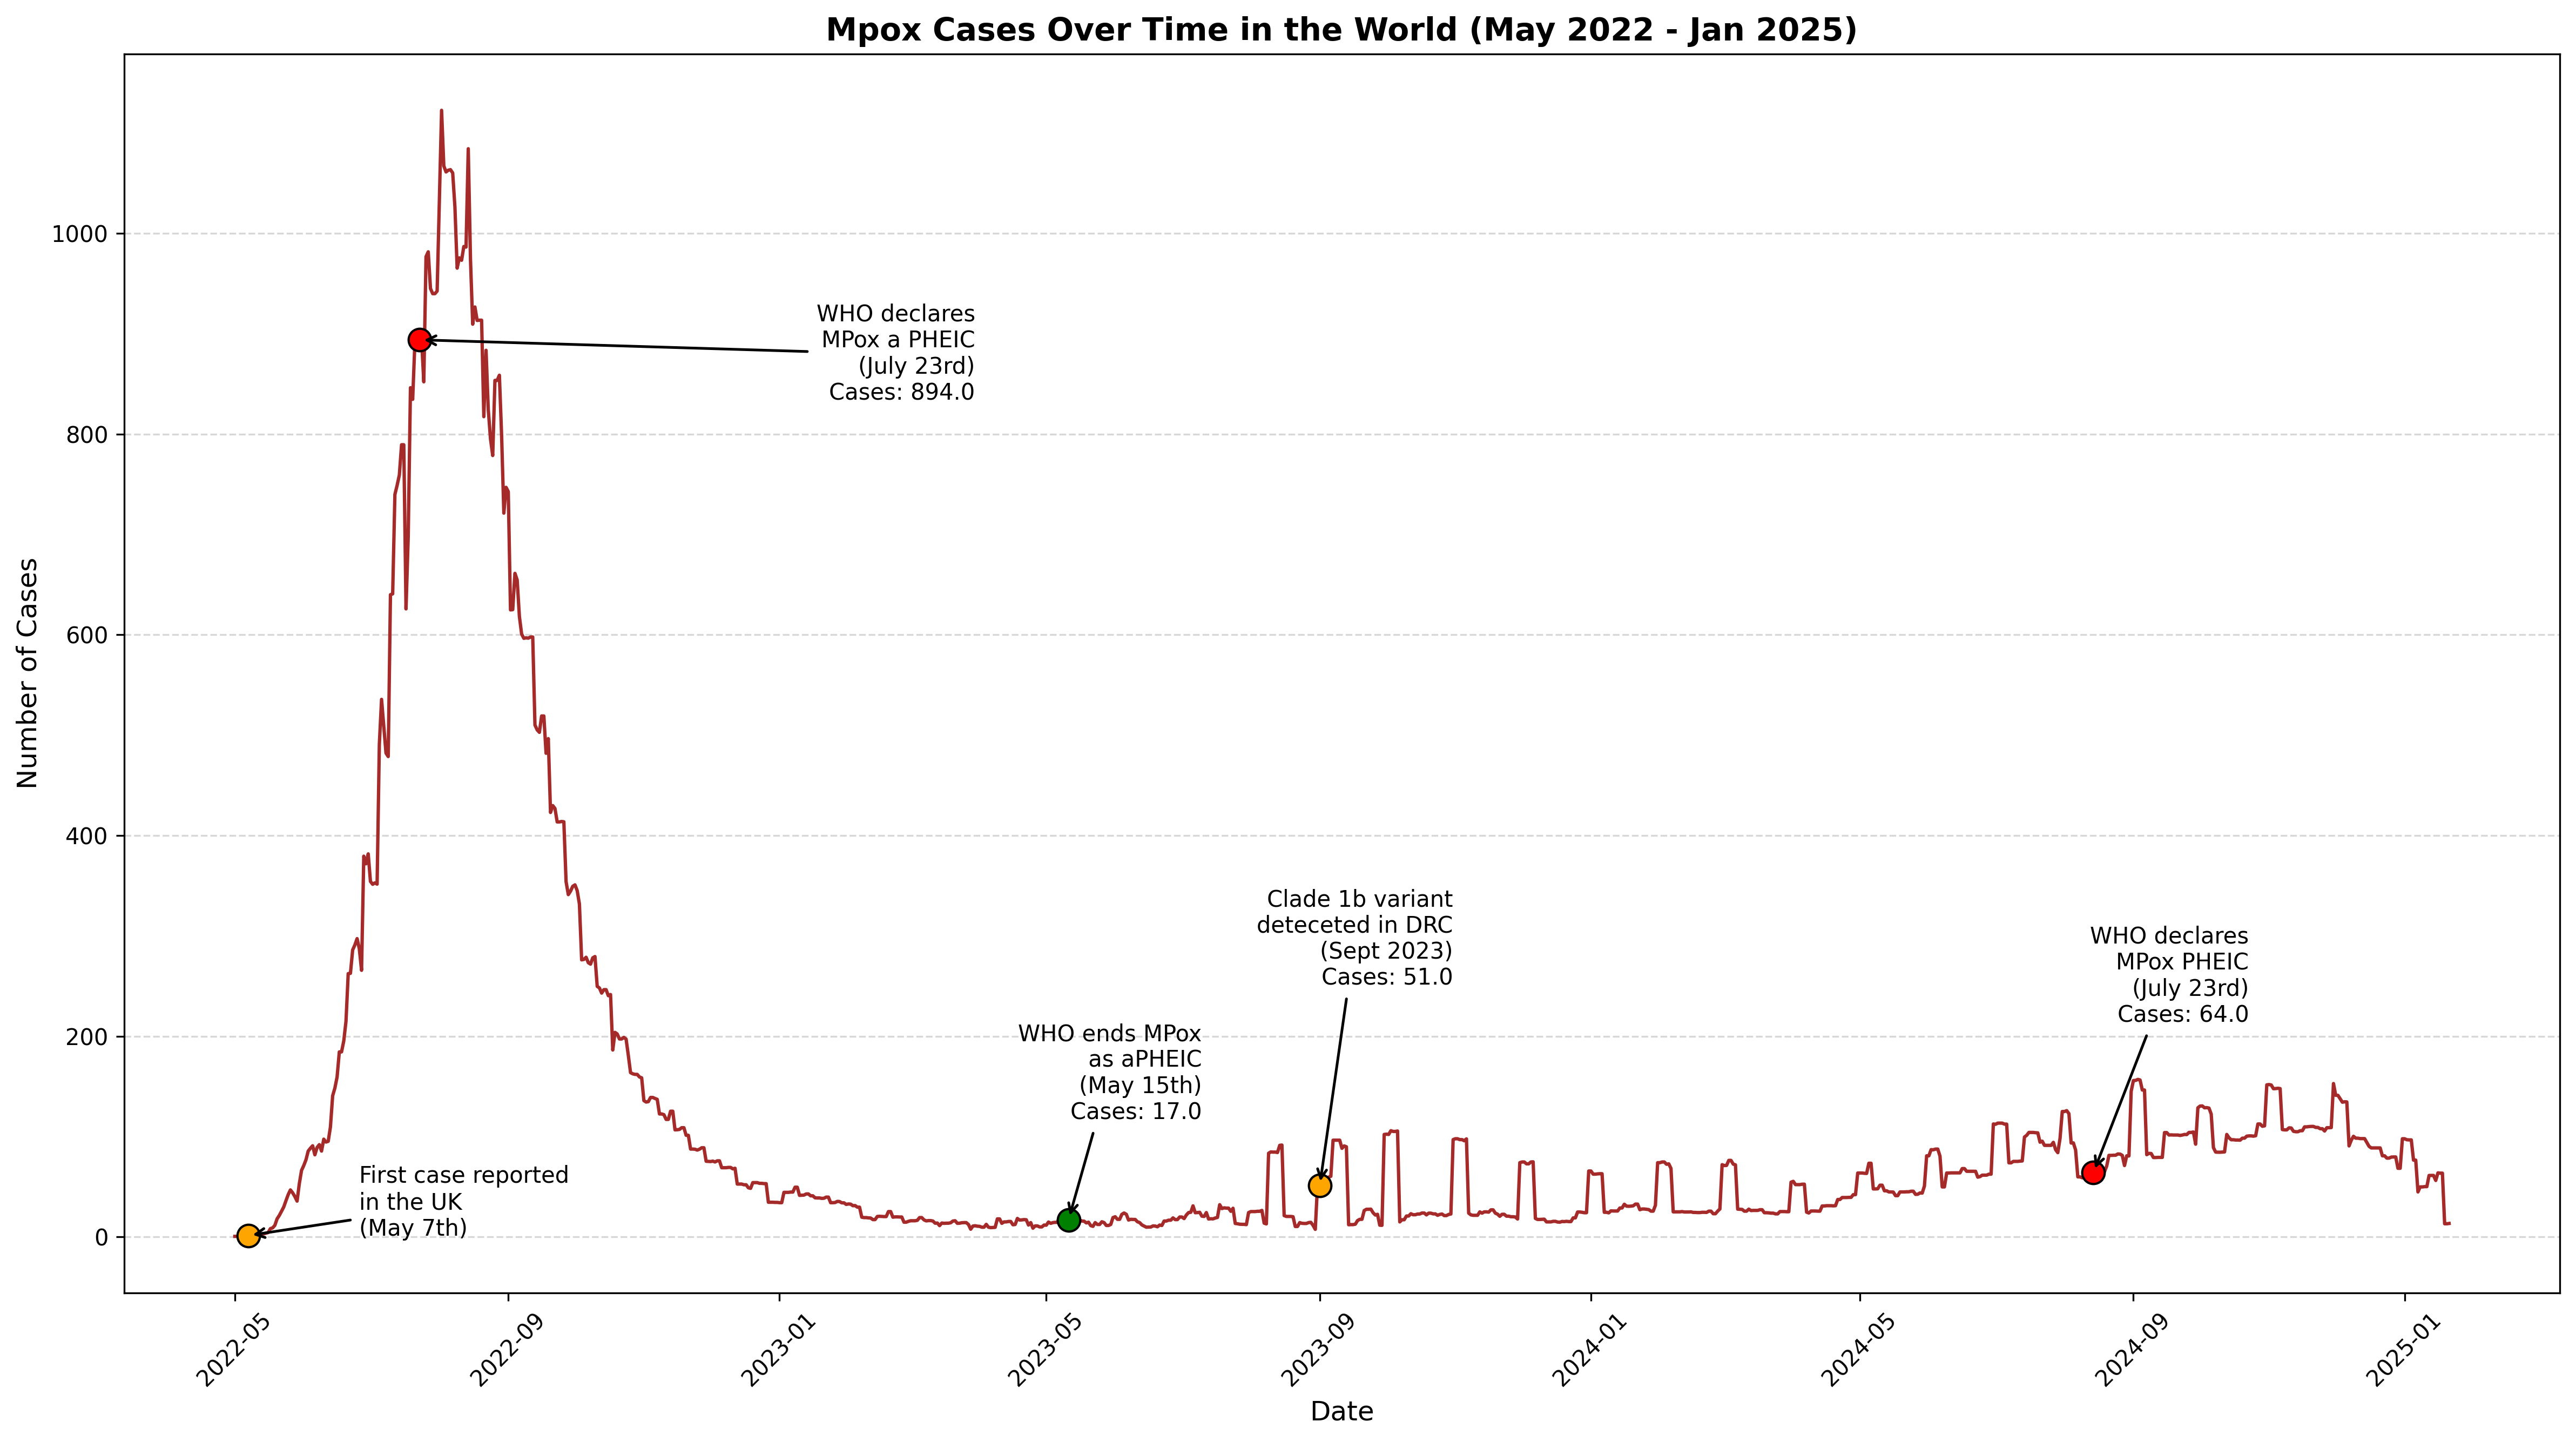

In [5]:
# Ensure 'Day' is in datetime format
mpox_daily['Day'] = pd.to_datetime(mpox_daily['Day'])

# Aggregate daily cases
mpox_daily_wrld = mpox_daily.groupby('Day')['Daily cases'].sum()

# Convert to DataFrame (optional)
mpox_daily_wrld = pd.DataFrame(mpox_daily_wrld)

# Define key events
event_date1 = pd.to_datetime('2022-05-07')  # First UK case
event_label1 = "First case reported\nin the UK\n(May 7th)"

event_date2 = pd.to_datetime('2022-07-23')  # WHO declares PHEIC
event_label2 = "WHO declares\nMPox a PHEIC\n(July 23rd)"

event_date3 = pd.to_datetime('2023-05-11')  # WHO declares PHEIC
event_label3 = "WHO ends MPox\n as aPHEIC\n(May 15th)"

event_date4 = pd.to_datetime('2023-09-01')  # WHO declares PHEIC
event_label4 = "Clade 1b variant\ndeteceted in DRC\n(Sept 2023)"

event_date5 = pd.to_datetime('2024-08-14')  # WHO declares PHEIC
event_label5 = "WHO declares\nMPox PHEIC\n(July 23rd)"

# Plot
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
ax.plot(mpox_daily_wrld.index, mpox_daily_wrld['Daily cases'], linestyle='-', color='brown', linewidth=1.5)

# Add markers with better visibility
ax.scatter(event_date1, mpox_daily_wrld.loc[event_date1, 'Daily cases'], 
           color='orange', edgecolors='black', s=100, zorder=3)
ax.scatter(event_date2, mpox_daily_wrld.loc[event_date2, 'Daily cases'], 
           color='red', edgecolors='black', s=100, zorder=3)
ax.scatter(event_date3, mpox_daily_wrld.loc[event_date3, 'Daily cases'], 
           color='green', edgecolors='black', s=100, zorder=3)
ax.scatter(event_date4, mpox_daily_wrld.loc[event_date4, 'Daily cases'], 
           color='orange', edgecolors='black', s=100, zorder=3)
ax.scatter(event_date5, mpox_daily_wrld.loc[event_date5, 'Daily cases'], 
           color='red', edgecolors='black', s=100, zorder=3)           
#Annotate
ax.annotate(event_label1, 
            xy=(event_date1, mpox_daily_wrld.loc[event_date1, 'Daily cases']),  # Point location
            xytext=(event_date1 + pd.Timedelta(days=50),  # Move label 20 days forward (Right)
                    mpox_daily_wrld.loc[event_date1, 'Daily cases'] + 0),  # Move label 300 units up
            arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
            fontsize=10, color='black', ha='left')

# Annotate event 2 with the number of cases
cases_at_event2 = mpox_daily_wrld.loc[event_date2, 'Daily cases'].round()
ax.annotate(f'{event_label2}\nCases: {cases_at_event2}', 
            xy=(event_date2, cases_at_event2),  # Point location
            xytext=(event_date2 + pd.Timedelta(days=250),  # Move label 15 days backward (Left)
                    cases_at_event2 - 60),  # Move label 200 units down
            arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
            fontsize=10, color='black', ha='right')
# Annotate event 3 with the number of cases
cases_at_event3 = mpox_daily_wrld.loc[event_date3, 'Daily cases'].round()
ax.annotate(f'{event_label3}\nCases: {cases_at_event3}', 
            xy=(event_date3, cases_at_event3),  # Point location
            xytext=(event_date3 + pd.Timedelta(days=60),  # Move label 15 days backward (Left)
                    cases_at_event3 + 100),  # Move label 200 units down
            arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
            fontsize=10, color='black', ha='right')
cases_at_event4 = mpox_daily_wrld.loc[event_date4, 'Daily cases'].round()
ax.annotate(f'{event_label4}\nCases: {cases_at_event4}', 
            xy=(event_date4, cases_at_event4),  # Point location
            xytext=(event_date4 + pd.Timedelta(days=60),  # Move label 15 days backward (Left)
                    cases_at_event4 + 200),  # Move label 200 units down
            arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
            fontsize=10, color='black', ha='right')
cases_at_event5 = mpox_daily_wrld.loc[event_date5, 'Daily cases'].round()
ax.annotate(f'{event_label5}\nCases: {cases_at_event5}', 
            xy=(event_date5, cases_at_event5),  # Point location
            xytext=(event_date5 + pd.Timedelta(days=70),  # Move label 15 days backward (Left)
                    cases_at_event5 + 150),  # Move label 200 units down
            arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
            fontsize=10, color='black', ha='right')
# Formatting
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of Cases", fontsize=12)
ax.set_title("Mpox Cases Over Time in the World (May 2022 - Jan 2025)", fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
ax.tick_params(axis='x', rotation=45)

# Improve grid aesthetics
ax.grid(axis='y',linestyle='dashed', alpha=0.5)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Chloropleth of Infections May 2025 - Date

In [ ]:
# Read file
geo_df = gpd.read_file('Data/country_shapes.geojson')
geo_df = geo_df[['cntry_name', 'geometry']]
geo_df.to_file("Data/geometry_df.geojson", driver="GeoJSON")

MPox confirmed cases and comfirmed deaths since 2022

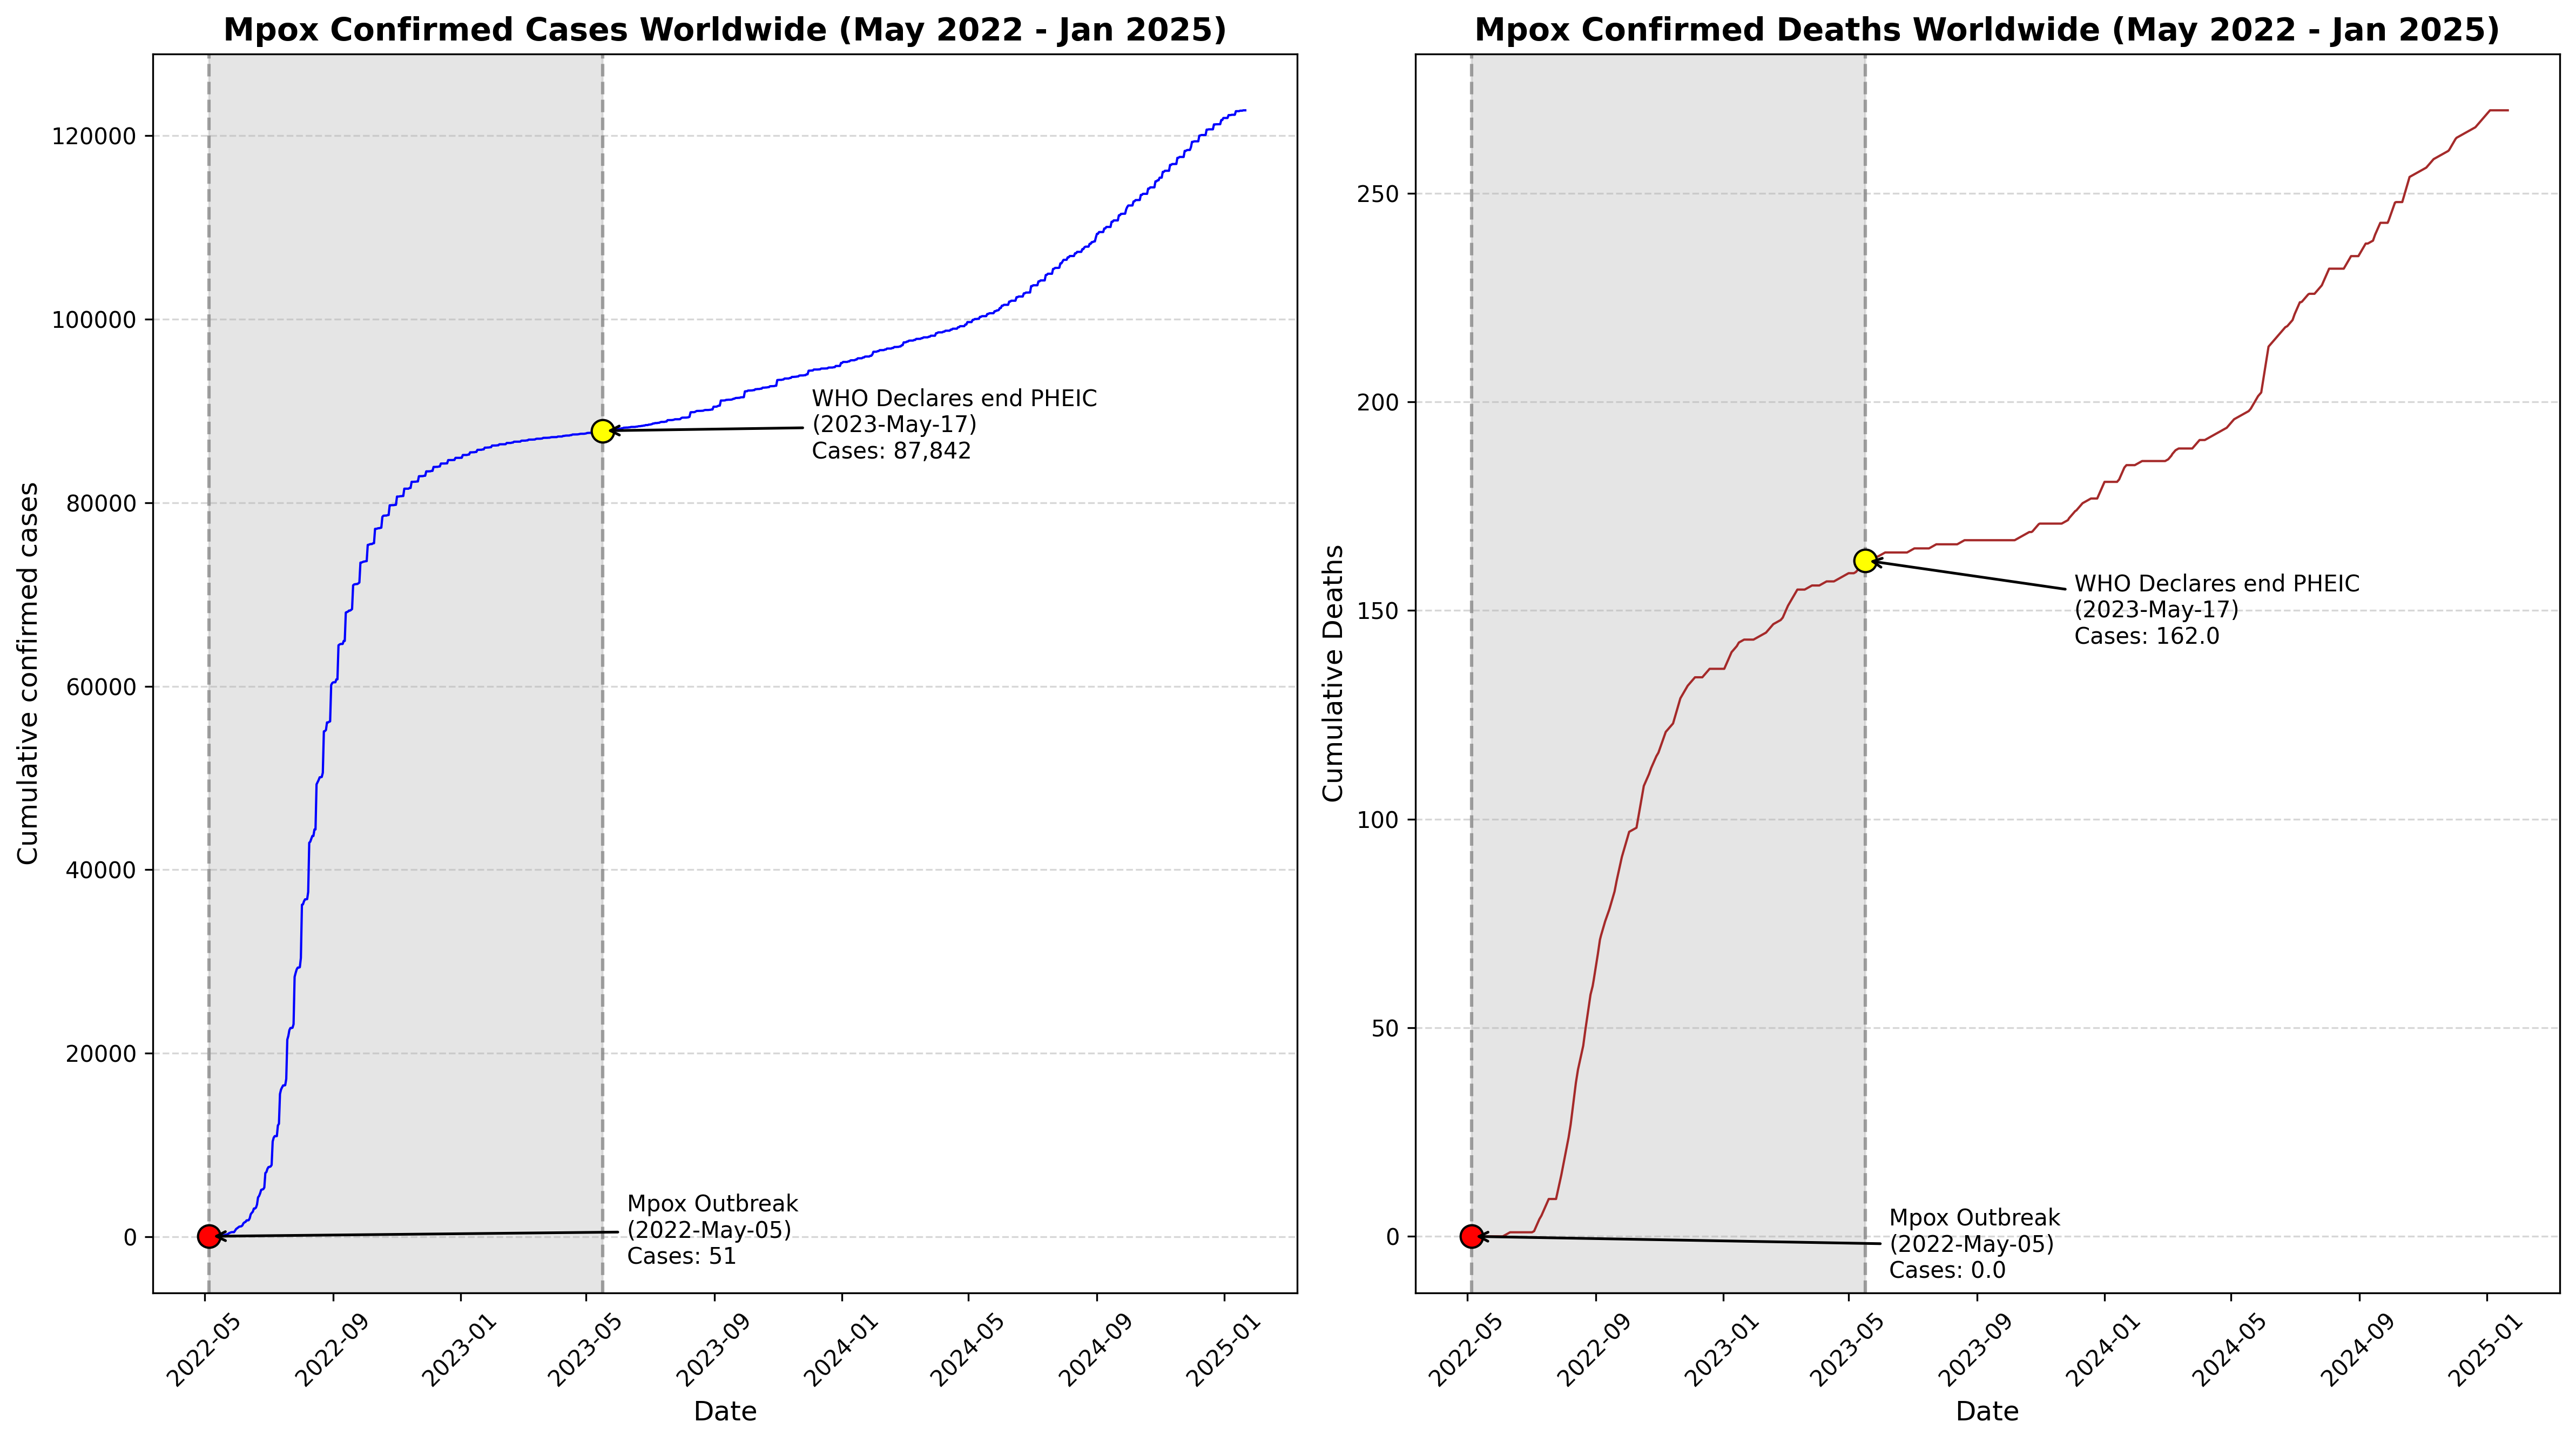

In [65]:
# Load the data
mpox_deaths_df = pd.read_csv('Data/mpox-daily-confirmed-deaths.csv')
mpox_confirmed_df = pd.read_csv('Data/mpox-cumulative-confirmed-and-suspected-cases.csv')

# Compute cumulative deaths
mpox_deaths_df['Cumulative_deaths'] = mpox_deaths_df['Daily deaths'].cumsum()

# Convert 'Day' column to datetime
mpox_deaths_df['Day'] = pd.to_datetime(mpox_deaths_df['Day'])
mpox_confirmed_df['Day'] = pd.to_datetime(mpox_confirmed_df['Day'])

# Group by Day and get total cases/deaths
mpox_deaths_world = mpox_deaths_df.groupby('Day')['Cumulative_deaths'].sum().reset_index()
mpox_confirmed_world = mpox_confirmed_df.groupby('Day')['Total confirmed cases'].sum().reset_index()

# Plot
fig, ax = plt.subplots(1, 2, figsize=(16, 9), dpi=300)

# Plot confirmed cases
ax[0].plot(mpox_confirmed_world['Day'], mpox_confirmed_world['Total confirmed cases'], 
           linestyle='-', color='blue', linewidth=1)

# Plot cumulative deaths
ax[1].plot(mpox_deaths_world['Day'], mpox_deaths_world['Cumulative_deaths'], 
           linestyle='-', color='brown', linewidth=1)

# Label axes and titles
ax[0].set_xlabel("Date", fontsize=12)
ax[0].set_ylabel("Cumulative confirmed cases", fontsize=12)
ax[0].set_title("Mpox Confirmed Cases Worldwide (May 2022 - Jan 2025)", fontsize=14, fontweight='bold')

ax[1].set_xlabel("Date", fontsize=12)
ax[1].set_ylabel("Cumulative Deaths", fontsize=12)
ax[1].set_title("Mpox Confirmed Deaths Worldwide (May 2022 - Jan 2025)", fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

# Improve grid aesthetics
ax[0].grid(axis='y',linestyle='dashed', alpha=0.5)
ax[1].grid(axis='y',linestyle='dashed', alpha=0.5)

## Axis[0] when WHO declares end of PHEIC
# Annotate WHO's Public Health Emergency of International Concern (PHEIC) declaration
event_date = pd.to_datetime('2023-05-17')  
event_label = "WHO Declares end PHEIC\n(2023-May-17)"

# Get y-value for annotation safely
event_cases_row = mpox_confirmed_world[mpox_confirmed_world['Day'] == event_date]

if not event_cases_row.empty:
    event_cases = event_cases_row['Total confirmed cases'].values[0]

    # Scatter point on the plot
    ax[0].scatter(event_date, event_cases, color='yellow', edgecolors='black', s=100, zorder=3)

    # Annotate with event label and case count
    annotation_text = f"{event_label}\nCases: {event_cases:,}"  # Format number with comma

    ax[0].annotate(annotation_text,  
                   xy=(event_date, event_cases),  
                   xytext=(event_date + pd.Timedelta(days=200), event_cases - 3000),  
                   arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
                   fontsize=10, color='black', ha='left')

## Axis[0] when WHO declares Mpox Outbreak
event_date3 = pd.to_datetime('2022-05-05')  
event_label3 = "Mpox Outbreak\n(2022-May-05)"

# Get y-value for annotation safely
event_cases_row3 = mpox_confirmed_world[mpox_confirmed_world['Day'] == event_date3]

if not event_cases_row3.empty:
    event_cases3 = event_cases_row3['Total confirmed cases'].values[0]

    # Scatter point on the plot
    ax[0].scatter(event_date3, event_cases3, color='red', edgecolors='black', s=100, zorder=3)

    # Annotate with event label and case count
    annotation_text = f"{event_label3}\nCases: {event_cases3:,}"  # Format number with comma

    ax[0].annotate(annotation_text,  
                   xy=(event_date3, event_cases3),  
                   xytext=(event_date3 + pd.Timedelta(days=400), event_cases3 - 3000),  
                   arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
                   fontsize=10, color='black', ha='left')
## Axis[1] when WHO declares end of PHEIC
event_date2 = pd.to_datetime('2023-05-17')  
event_label2 = "WHO Declares end PHEIC\n(2023-May-17)"
# Get y-value for annotation safely
event_cases_row2 = mpox_deaths_world[mpox_deaths_world['Day'] == event_date]
if not event_cases_row2.empty:
    event_cases2 = (event_cases_row2['Cumulative_deaths'].values[0]).round()

    # Scatter point on the plot
    ax[1].scatter(event_date2, event_cases2, color='yellow', edgecolors='black', s=100, zorder=3)

    # Annotate with event label and case count
    annotation_text = f"{event_label2}\nCases: {event_cases2:,}"  # Format number with comma

    ax[1].annotate(annotation_text,  
                   xy=(event_date2, event_cases2),  
                   xytext=(event_date2 + pd.Timedelta(days=200), event_cases2 - 20),  
                   arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
                   fontsize=10, color='black', ha='left')
## Axis[0] when WHO declares Mpox outbreak
event_date4 = pd.to_datetime('2022-05-05')  
event_label4 = "Mpox Outbreak\n(2022-May-05)"
# Get y-value for annotation safely
event_cases_row4 = mpox_deaths_world[mpox_deaths_world['Day'] == event_date4]
if not event_cases_row4.empty:
    event_cases4 = (event_cases_row4['Cumulative_deaths'].values[0]).round()

    # Scatter point on the plot
    ax[1].scatter(event_date4, event_cases4, color='red', edgecolors='black', s=100, zorder=3)

    # Annotate with event label and case count
    annotation_text = f"{event_label4}\nCases: {event_cases4:,}"  # Format number with comma

    ax[1].annotate(annotation_text,  
                   xy=(event_date4, event_cases4),  
                   xytext=(event_date4 + pd.Timedelta(days=400), event_cases4 - 10),  
                   arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
                   fontsize=10, color='black', ha='left')
# Add vertical dashed lines to mark the start and end of the period
# Highlight the period of interest with a shaded area
ax[0].axvspan(pd.to_datetime('2022-05-05'), pd.to_datetime('2023-05-17'), 
              color='gray', alpha=0.2)  # Adjust alpha for transparency

ax[1].axvspan(pd.to_datetime('2022-05-05'), pd.to_datetime('2023-05-17'), 
              color='gray', alpha=0.2)

# Add vertical dashed lines to mark the start and end of the period
ax[0].axvline(pd.to_datetime('2022-05-05'), color='gray', linestyle='dashed', linewidth=1.5, alpha=0.7)
ax[0].axvline(pd.to_datetime('2023-05-17'), color='gray', linestyle='dashed', linewidth=1.5, alpha=0.7)

ax[1].axvline(pd.to_datetime('2022-05-05'), color='gray', linestyle='dashed', linewidth=1.5, alpha=0.7)
ax[1].axvline(pd.to_datetime('2023-05-17'), color='gray', linestyle='dashed', linewidth=1.5, alpha=0.7)
# Adjust layout and show plot
plt.tight_layout()
plt.show()


Top 5 countries in the world with the highest number of cases in the world from May 7th 2022 to May 15th 2023

Shape of df_filtered: (37070, 17)


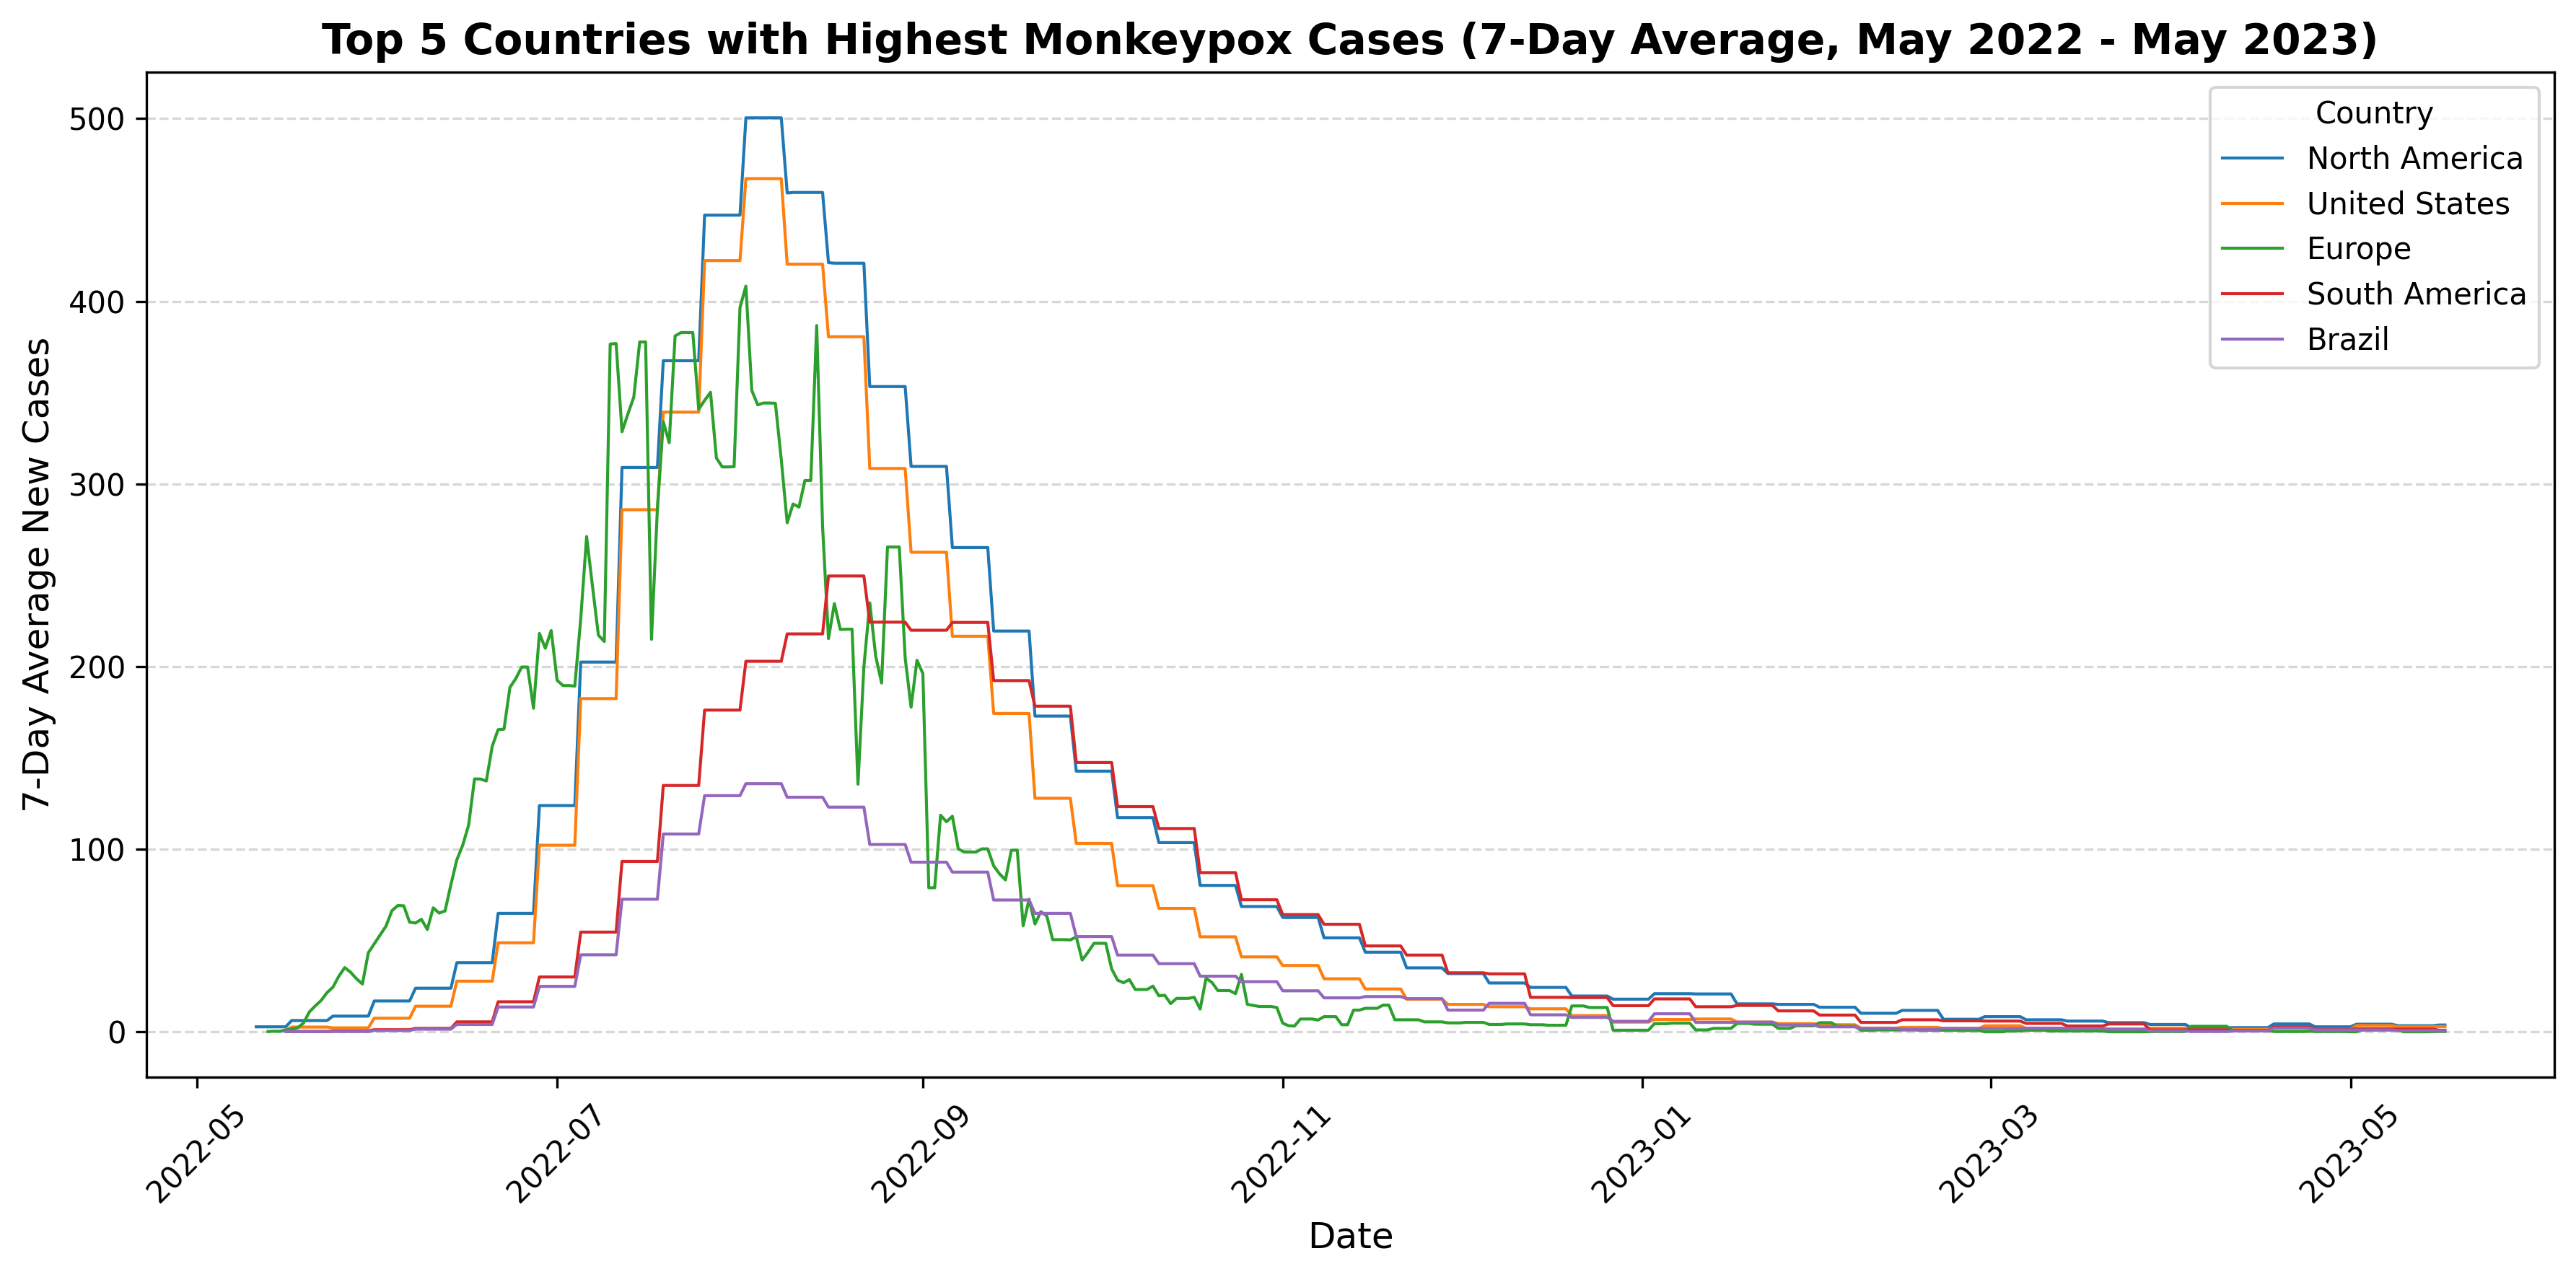

In [66]:
# Load data
df = pd.read_csv('Data/monkeypox_data.csv', low_memory=False)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define time range
start_date = '2022-05-05'
end_date = '2023-05-17'

# Filter data within the time range
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
print(f'Shape of df_filtered: {df_filtered.shape}')

# Sum of cases by country
cases_by_location = df_filtered.groupby('location', as_index=False)['new_cases'].sum()

# Get top 5 countries with the highest cases
# top_5_countries = cases_by_location.sort_values(by='new_cases', ascending=False).head([1:6])['location'].tolist()
# Instead of dropping, just select index 1 to 5
top_5_countries = cases_by_location.sort_values(by='new_cases', ascending=False).iloc[1:6]['location'].tolist()

# Filter data for only these top 5 countries
df_top5 = df_filtered[df_filtered['location'].isin(top_5_countries)]

# Group by date and location
df_top5_grouped = df_top5.groupby(['date', 'location'], as_index=False)['new_cases'].sum()

# Apply 7-day moving average
df_top5_grouped['7_day_avg'] = df_top5_grouped.groupby('location')['new_cases'].transform(lambda x: x.rolling(7).mean())

# Plot
plt.figure(figsize=(12, 6), dpi=300)

# Plot each country with a different color
for country in top_5_countries:
    country_data = df_top5_grouped[df_top5_grouped['location'] == country]
    plt.plot(country_data['date'], country_data['7_day_avg'], label=country, linewidth=1)

# Labels and title
plt.xlabel("Date", fontsize=12)
plt.ylabel("7-Day Average New Cases", fontsize=12)
plt.title("Top 5 Countries with Highest Monkeypox Cases (7-Day Average, May 2022 - May 2023)", fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Grid for better visualization
plt.grid(axis='y',linestyle='dashed', alpha=0.5)

# Add legend
plt.legend(title="Country", fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


Cumulative Mpox Cases and deaths overtime

Shape of df_filtered: (37070, 17)


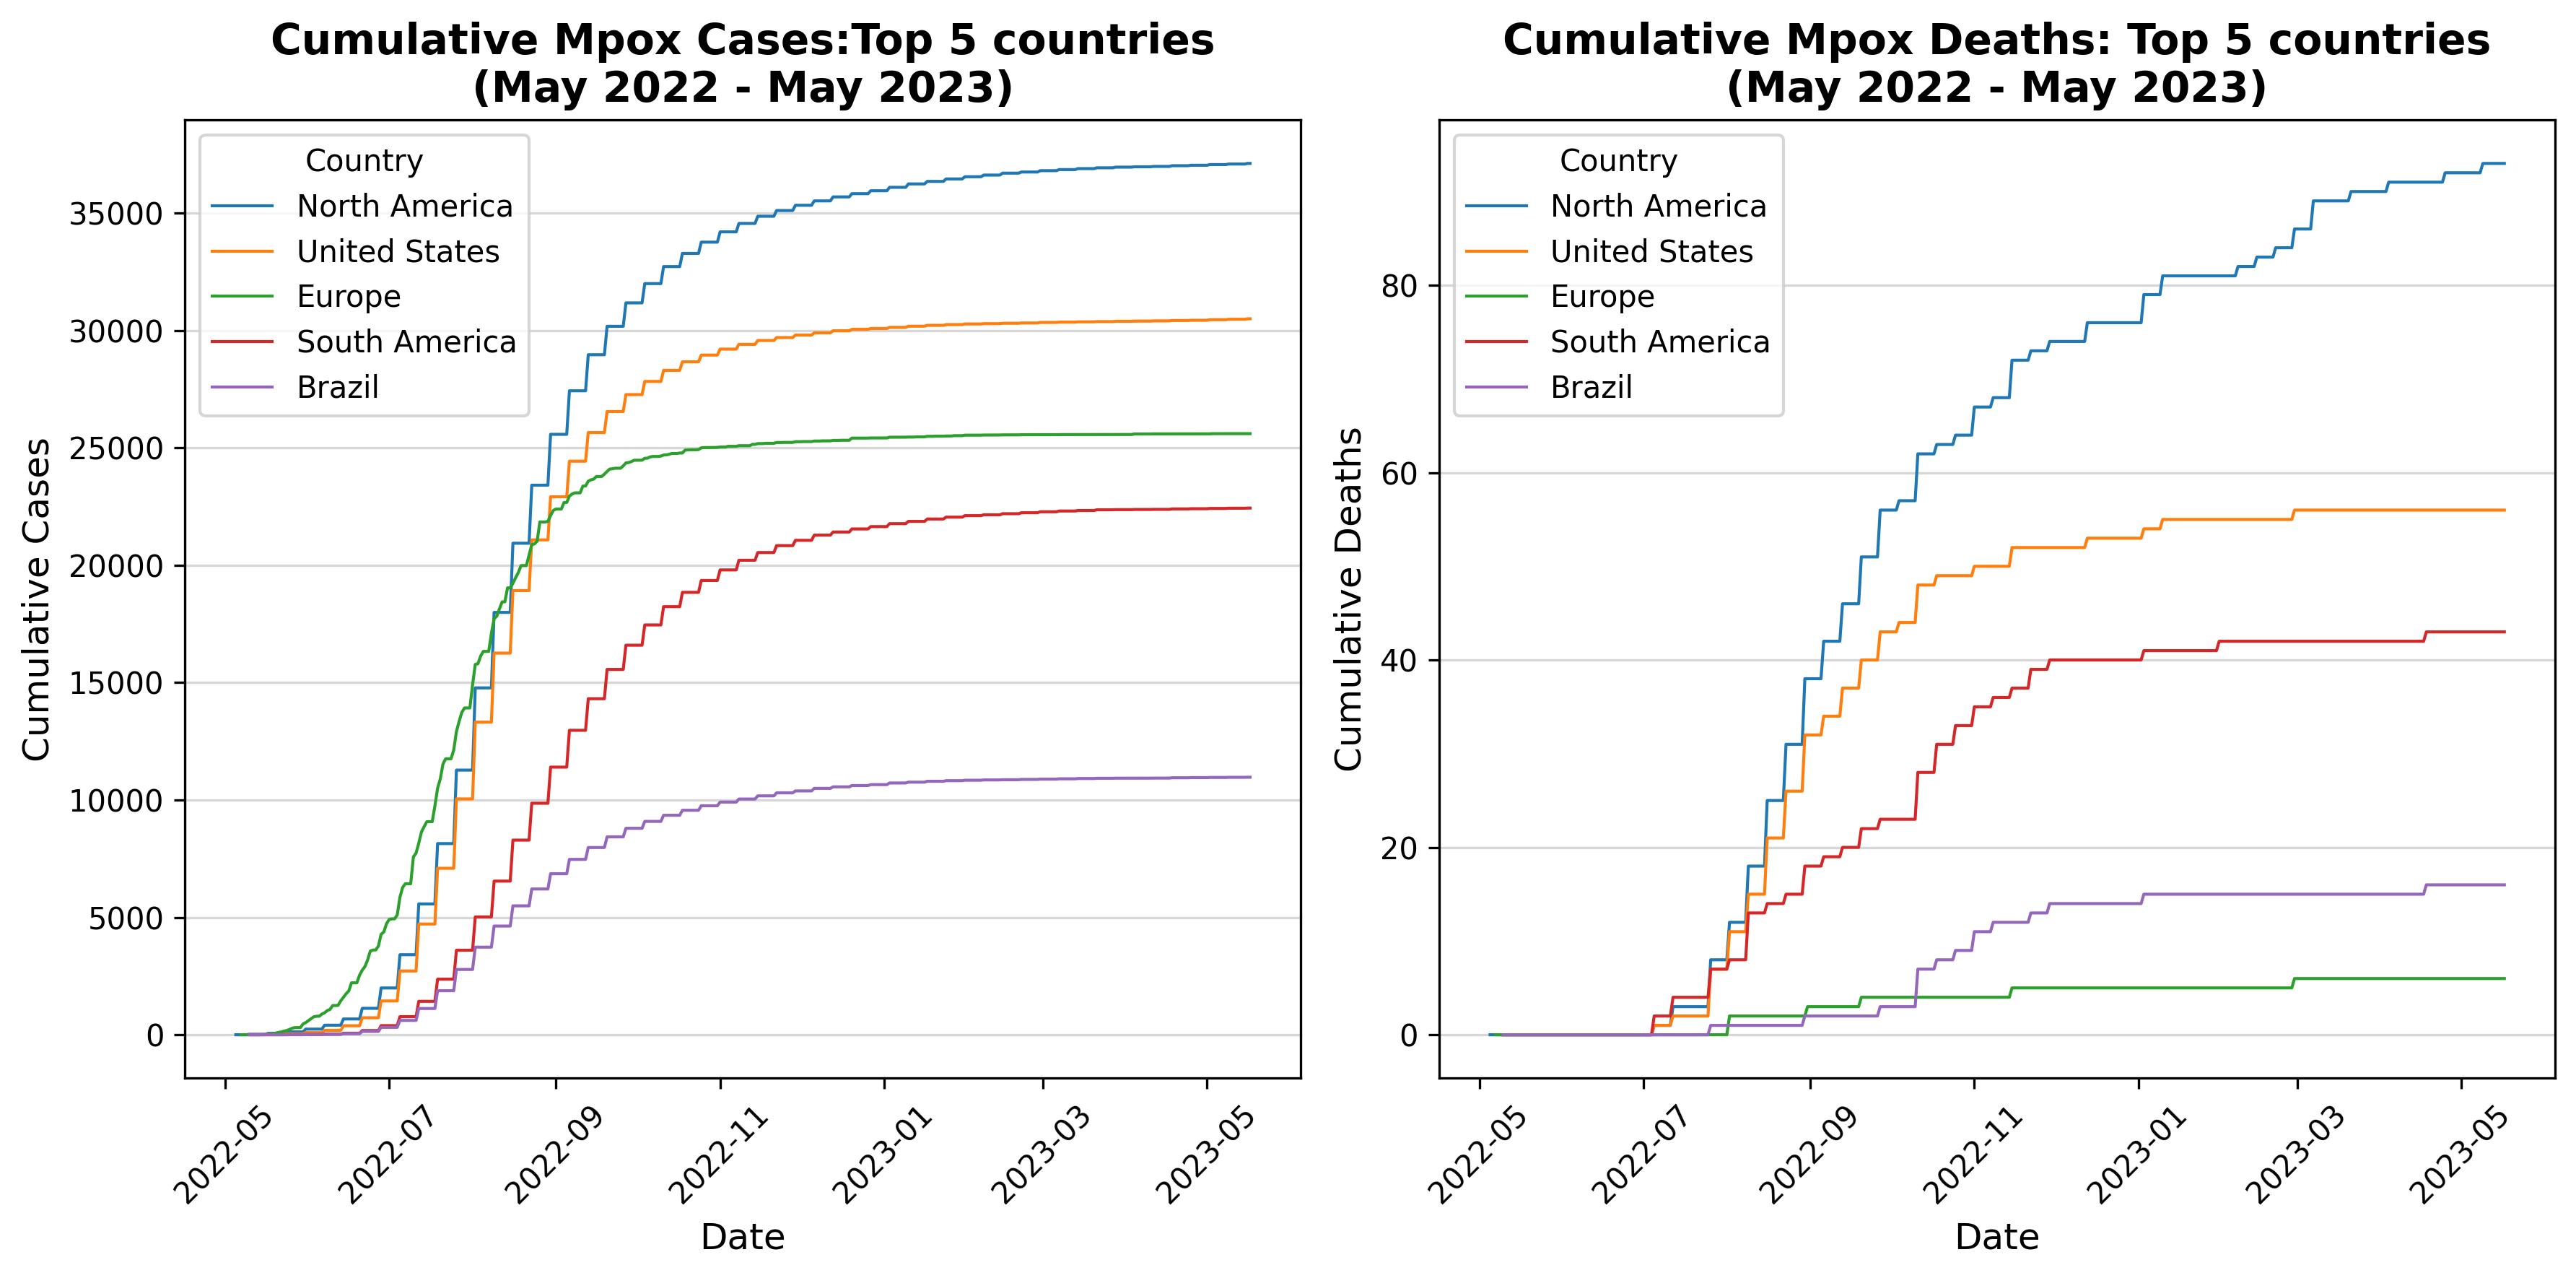

In [ ]:
# Filter dataset within the date range
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
print(f'Shape of df_filtered: {df_filtered.shape}')

# Aggregate total cases per country
cases_by_location = df_filtered.groupby('location', as_index=False)['new_cases'].sum()

# Sort and get the top 5 countries excluding the highest one
sorted_cases = cases_by_location.sort_values(by='new_cases', ascending=False)
top_5_countries = sorted_cases.iloc[1:6]['location'].tolist()  # Excluding the highest

# Filter dataset for the selected top 5 countries
df_top5 = df_filtered[df_filtered['location'].isin(top_5_countries)]

# Sort by date to compute cumulative sum properly
df_top5 = df_top5.sort_values(by=['location', 'date'])

# Compute cumulative sum of cases per country
df_top5['cumulative_cases'] = df_top5.groupby('location')['new_cases'].cumsum()

# Plot cumulative cases over time for the top 5 countries
fig, ax =plt.subplots(1,2, figsize=(12, 6), dpi=300)

for country in top_5_countries:
    country_data = df_top5[df_top5['location'] == country]
    ax[0].plot(country_data['date'], country_data['cumulative_cases'], label=country, linewidth=1)

# Formatting
ax[0].set_xlabel('Date', fontsize=12)
ax[0].set_ylabel('Cumulative Cases', fontsize=12)
ax[0].set_title('Cumulative Mpox Cases:Top 5 countries\n(May 2022 - May 2023)', fontsize=14, fontweight='bold')
ax[0].legend(title="Country")
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y',alpha=0.5)

# Compute cumulative sum of cases per country
df_top5['cumulative_cases'] = df_top5.groupby('location')['new_deaths'].cumsum()

# # Plot cumulative cases over time for the top 5 countries
# plt.figure(figsize=(12, 6))

for country in top_5_countries:
    country_data = df_top5[df_top5['location'] == country]
    ax[1].plot(country_data['date'], country_data['cumulative_cases'], label=country, linewidth=1)

# Formatting
ax[1].set_xlabel('Date', fontsize=12)
ax[1].set_ylabel('Cumulative Deaths', fontsize=12)
ax[1].set_title('Cumulative Mpox Deaths: Top 5 countries\n(May 2022 - May 2023)', fontsize=14, fontweight='bold')
ax[1].legend(title="Country")
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y',alpha=0.5)

# Tight layout
plt.tight_layout()
# Show plot
plt.show()


Total cases, Total deaths and Mortality rate in the top 5 affected countries (May 2022 - May 2023)

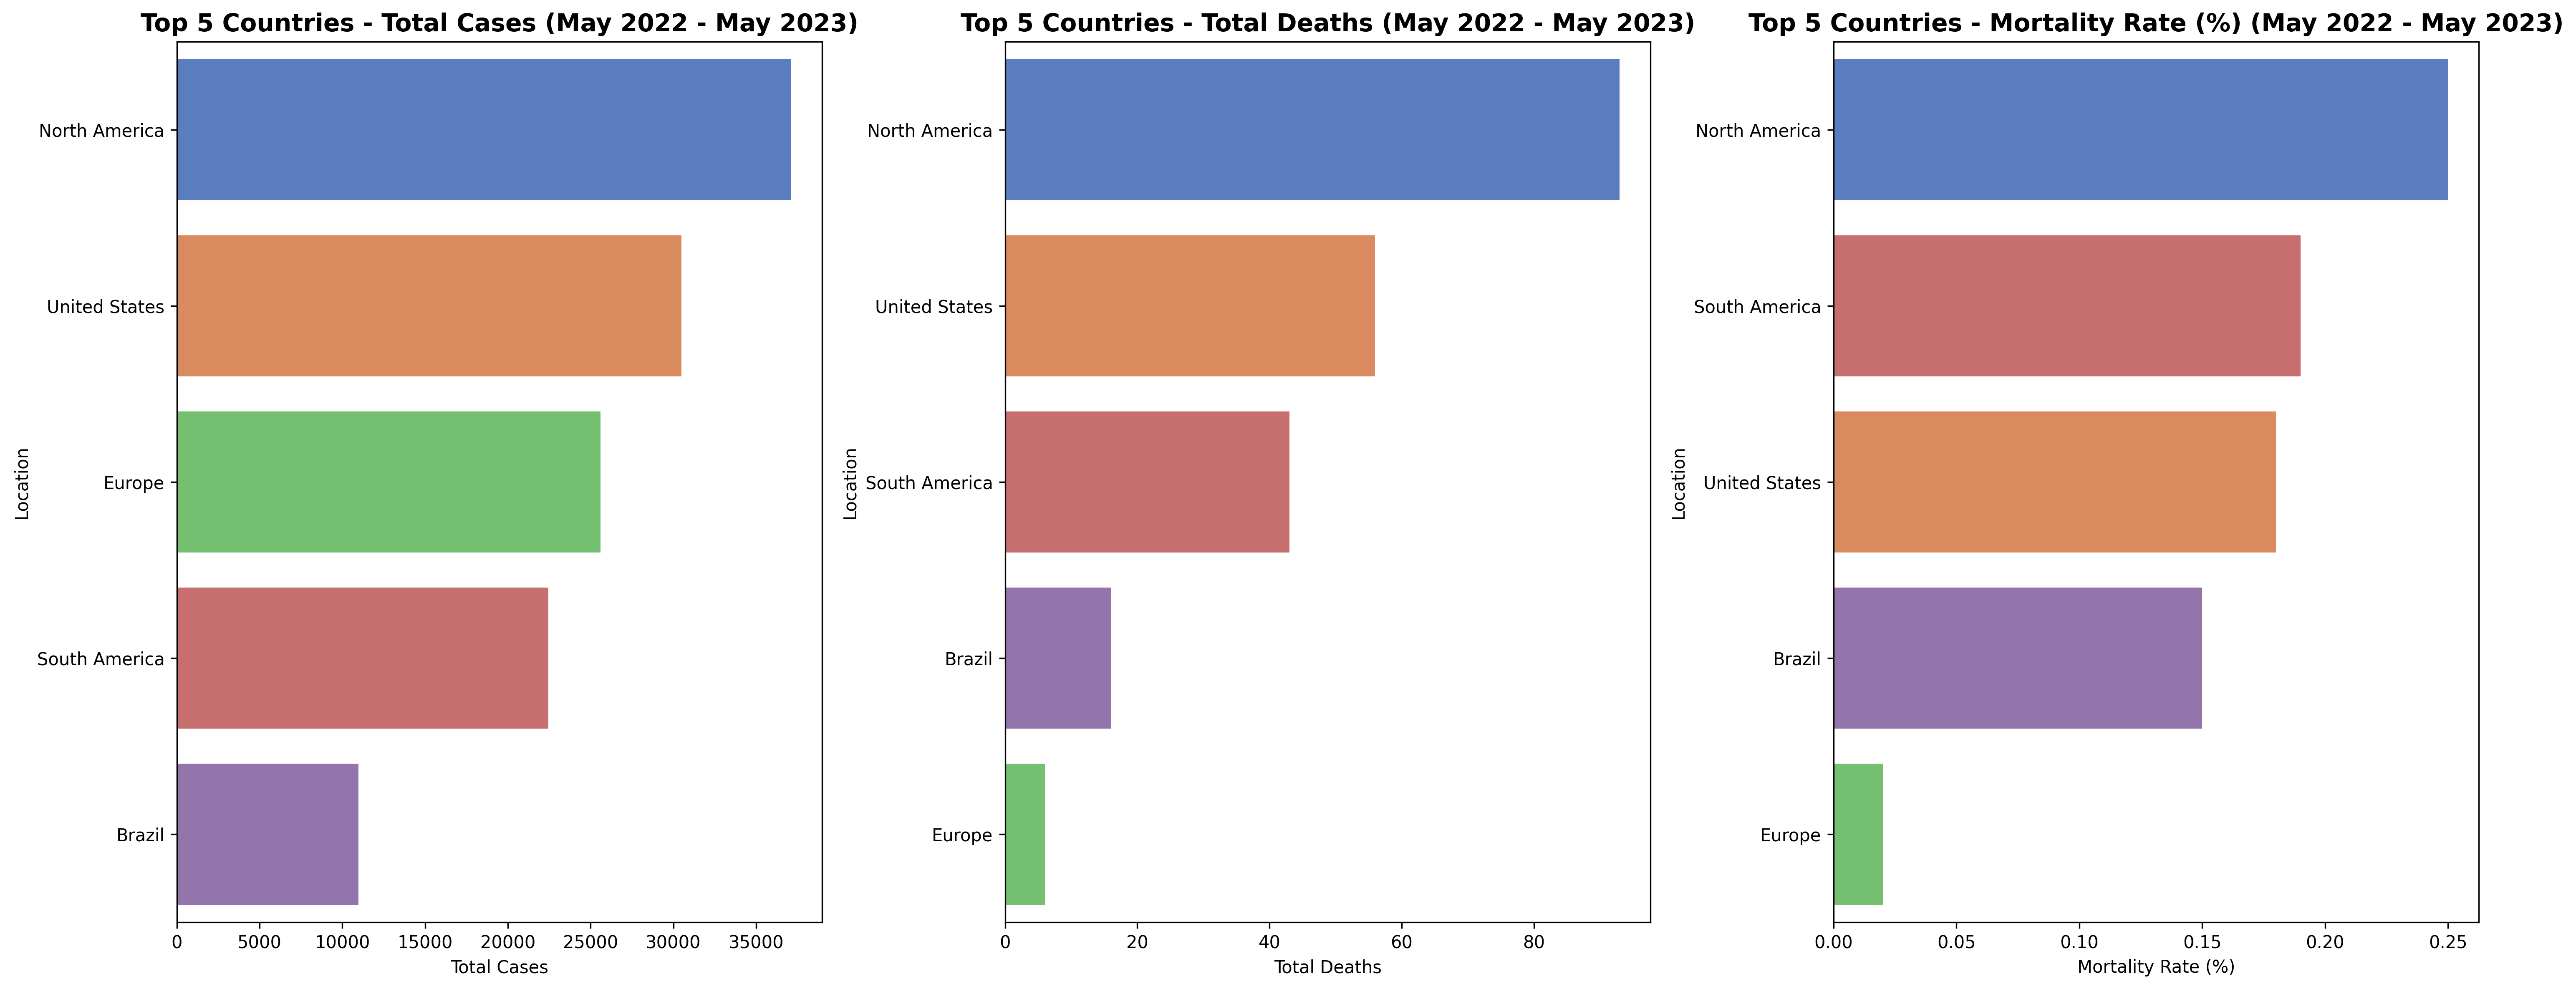


Values for top 5 countries by cases (May 2022 - May 2023):
North America: 37,132.0 cases, 93.0 deaths, 0.25% mortality rate
United States: 30,504.0 cases, 56.0 deaths, 0.18% mortality rate
Europe: 25,610.0 cases, 6.0 deaths, 0.02% mortality rate
South America: 22,439.0 cases, 43.0 deaths, 0.19% mortality rate
Brazil: 10,972.0 cases, 16.0 deaths, 0.15% mortality rate


In [51]:
# Calculate mortality rate
grouped_data['mortality_rate'] = (grouped_data['total_deaths'] / grouped_data['total_cases'] * 100).round(2)

# Get top 5 countries based on total cases
top_5_countries = grouped_data.sort_values(by='total_cases', ascending=False).iloc[1:6]

# Create a color palette dictionary for consistent colors
countries = top_5_countries['location'].unique()
colors = sns.color_palette('muted', n_colors=len(countries))
color_dict = dict(zip(countries, colors))

# Create figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8), dpi=300)

# Plot total cases (sorted by cases)
sns.barplot(x='total_cases', 
            y='location',
            data=top_5_countries.sort_values('total_cases', ascending=False),
            hue='location',
            palette=color_dict,
            legend=False,
            ax=ax[0])
ax[0].set_title('Top 5 Countries - Total Cases (May 2022 - May 2023)', fontweight='bold', fontsize=14)
ax[0].set_xlabel('Total Cases')
ax[0].set_ylabel('Location')

# Plot total deaths (sorted by deaths)
sns.barplot(x='total_deaths', 
            y='location',
            data=top_5_countries.sort_values('total_deaths', ascending=False),
            hue='location',
            palette=color_dict,
            legend=False,
            ax=ax[1])
ax[1].set_title('Top 5 Countries - Total Deaths (May 2022 - May 2023)', fontweight='bold', fontsize=14)
ax[1].set_xlabel('Total Deaths')
ax[1].set_ylabel('Location')

# Plot mortality rate (sorted by mortality)
sns.barplot(x='mortality_rate', 
            y='location',
            data=top_5_countries.sort_values('mortality_rate', ascending=False),
            hue='location',
            palette=color_dict,
            legend=False,
            ax=ax[2])
ax[2].set_title('Top 5 Countries - Mortality Rate (%) (May 2022 - May 2023)',  fontweight='bold', fontsize=14)
ax[2].set_xlabel('Mortality Rate (%)')
ax[2].set_ylabel('Location')

plt.tight_layout()
plt.show()

# Print the values for each metric
print("\nValues for top 5 countries by cases (May 2022 - May 2023):")
for _, row in top_5_countries.iterrows():
    print(f"{row['location']}: {row['total_cases']:,} cases, {row['total_deaths']:,} deaths, {row['mortality_rate']}% mortality rate")

Correlation Heatmap

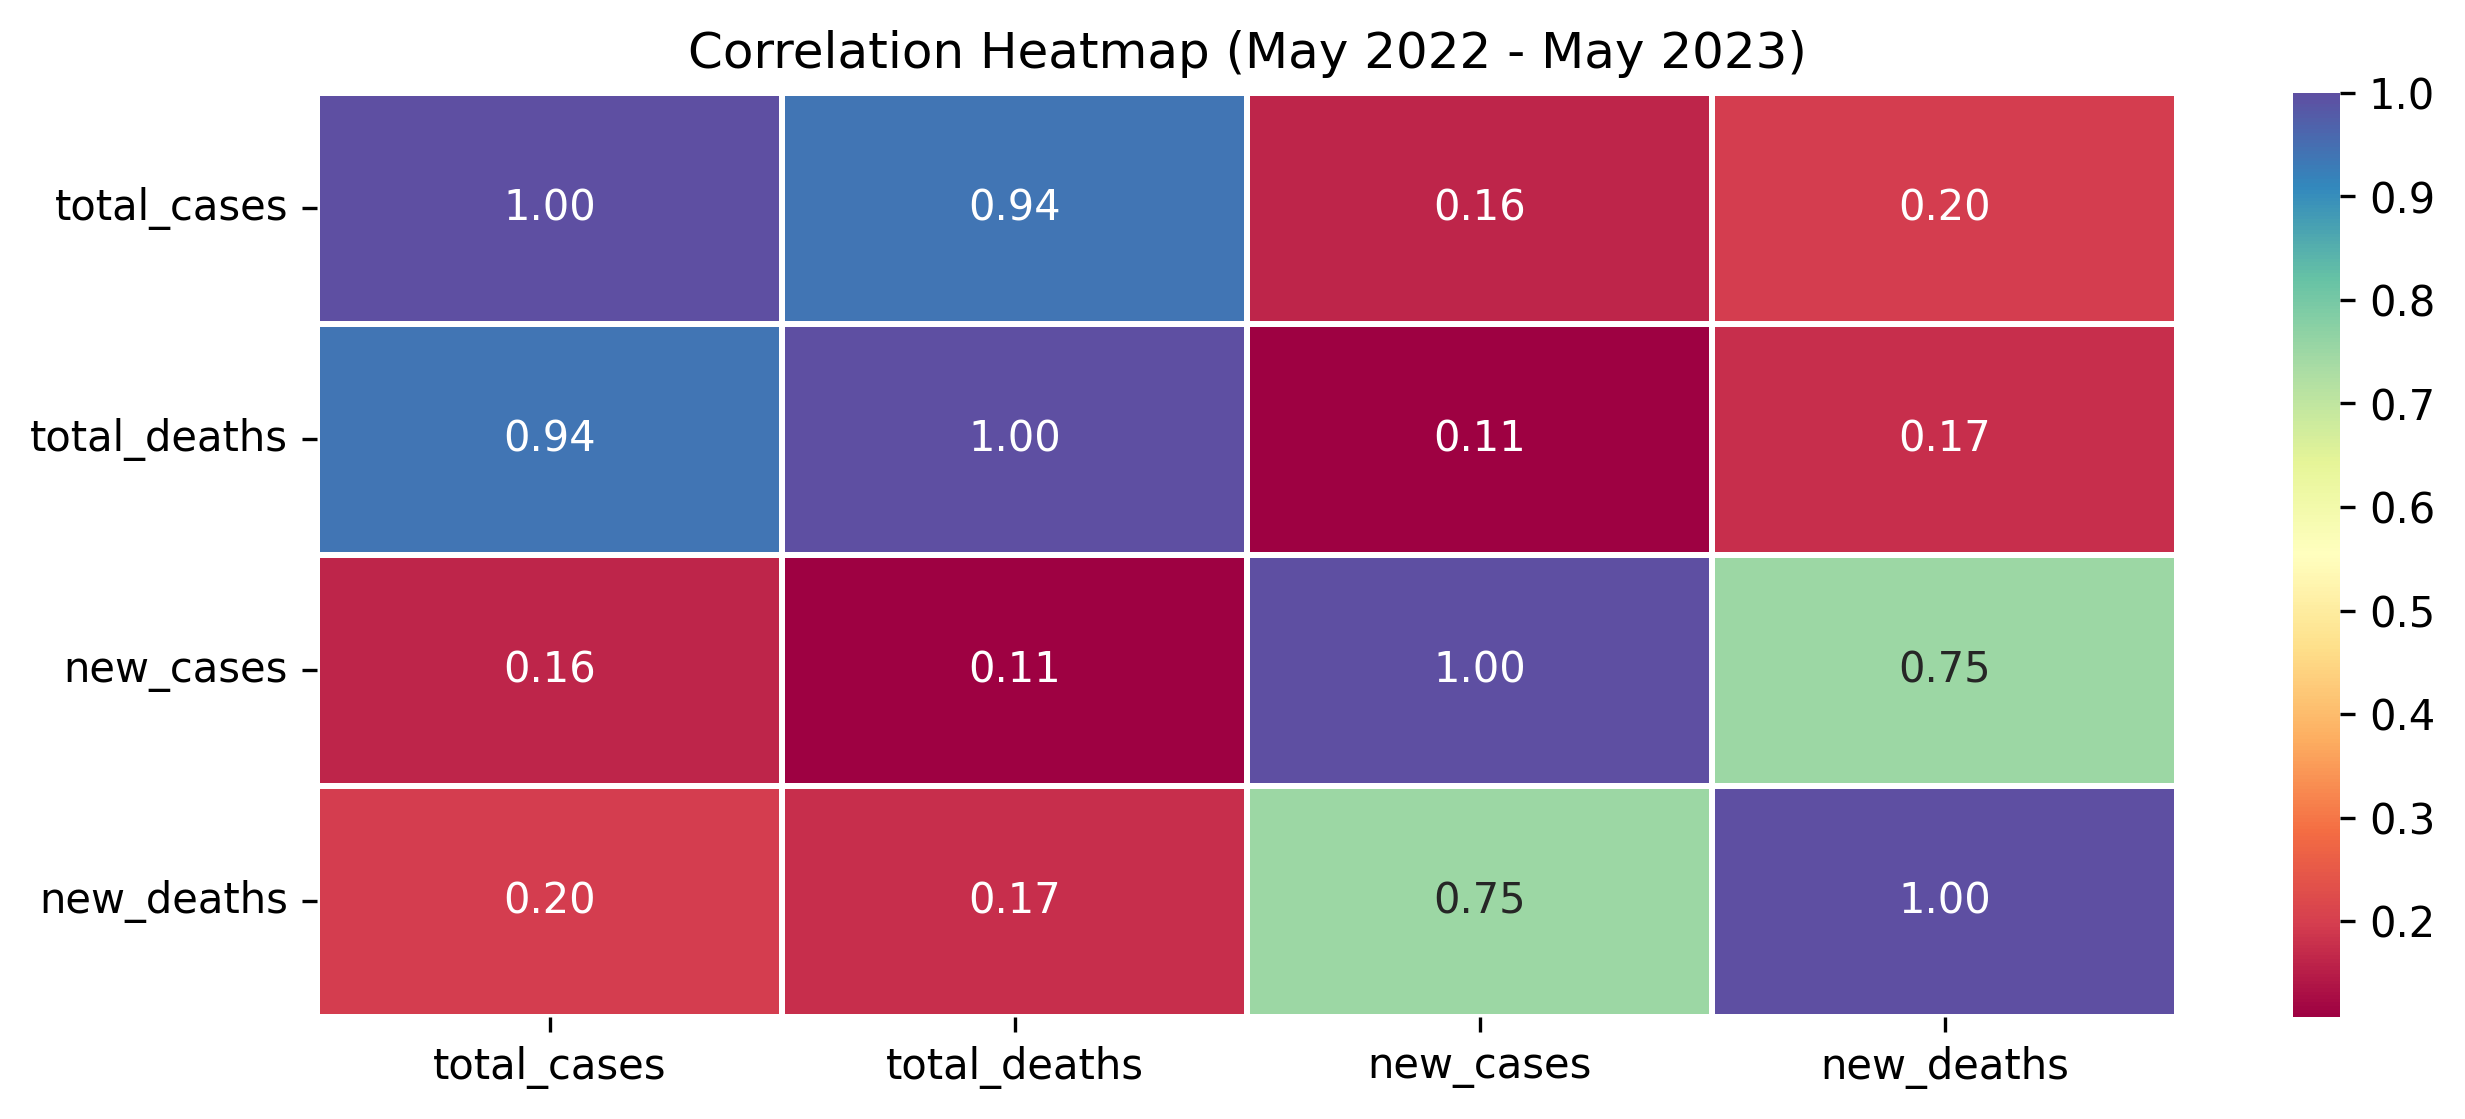

In [ ]:
# Compute correlation
correlation_matrix = df_filtered[
       ['total_cases', 'total_deaths',
       'new_cases', 'new_deaths']].corr()

# Plot heatmap
plt.figure(figsize=(10, 4), dpi=300)
sns.heatmap(correlation_matrix, annot=True, cmap="Spectral", fmt=".2f", linewidths=1, cbar=True)

plt.title("Correlation Heatmap (May 2022 - May 2023)")
plt.show()


- A higher correlation(0.94) means that total deaths are much more strongly linked to total cases than the new daily values.
This makes sense: over time, the cumulative number of deaths is tied to cumulative cases because long-term trends smooth out short-term fluctuations in deaths.
- A correlation of 0.75 indicates a strong positive relationship but not a perfect one.
When new cases rise, new deaths generally rise too, but not always proportionally due to external factors like medical interventions, reporting delays, and country-specific differences.

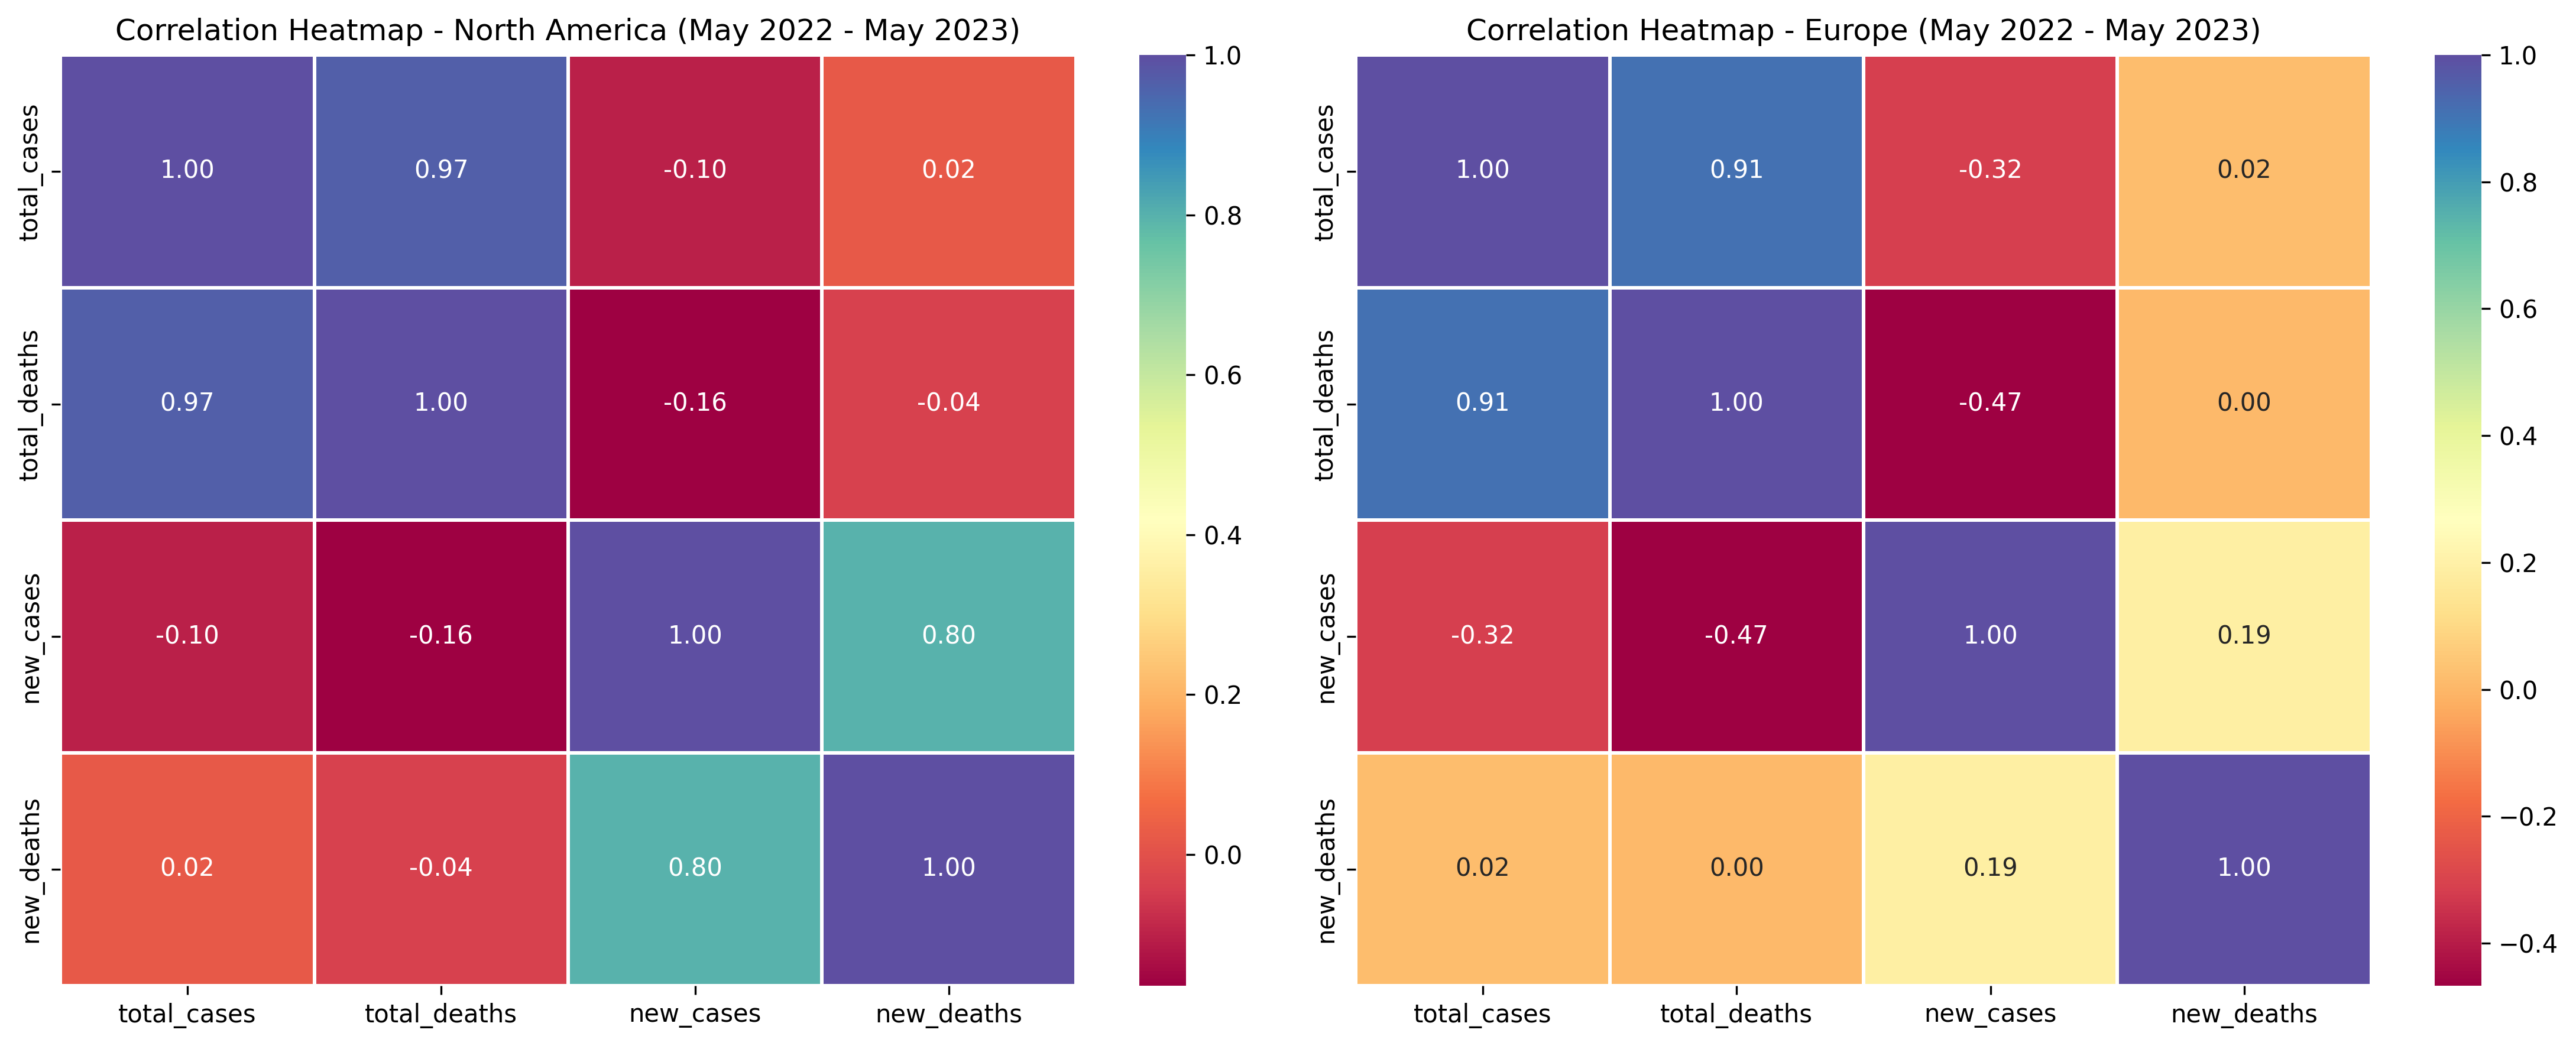

In [ ]:
# Filter for North America and Europe
df_north_america = df_filtered[df_filtered['location'] == 'North America']
df_europe = df_filtered[df_filtered['location'] == 'Europe']

# Compute correlation matrices
correlation_matrix_na = df_north_america[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']].corr()
correlation_matrix_europe = df_europe[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']].corr()

# Plot heatmaps
fig, ax = plt.subplots(1, 2, figsize=(15, 6), dpi=300)

sns.heatmap(correlation_matrix_na, annot=True, cmap="Spectral", fmt=".2f", linewidths=1, cbar=True, ax=ax[0])
ax[0].set_title("Correlation Heatmap - North America (May 2022 - May 2023)")

sns.heatmap(correlation_matrix_europe, annot=True, cmap="Spectral", fmt=".2f", linewidths=1, cbar=True, ax=ax[1])
ax[1].set_title("Correlation Heatmap - Europe (May 2022 - May 2023)")

plt.tight_layout()
plt.show()


Scatter Plot

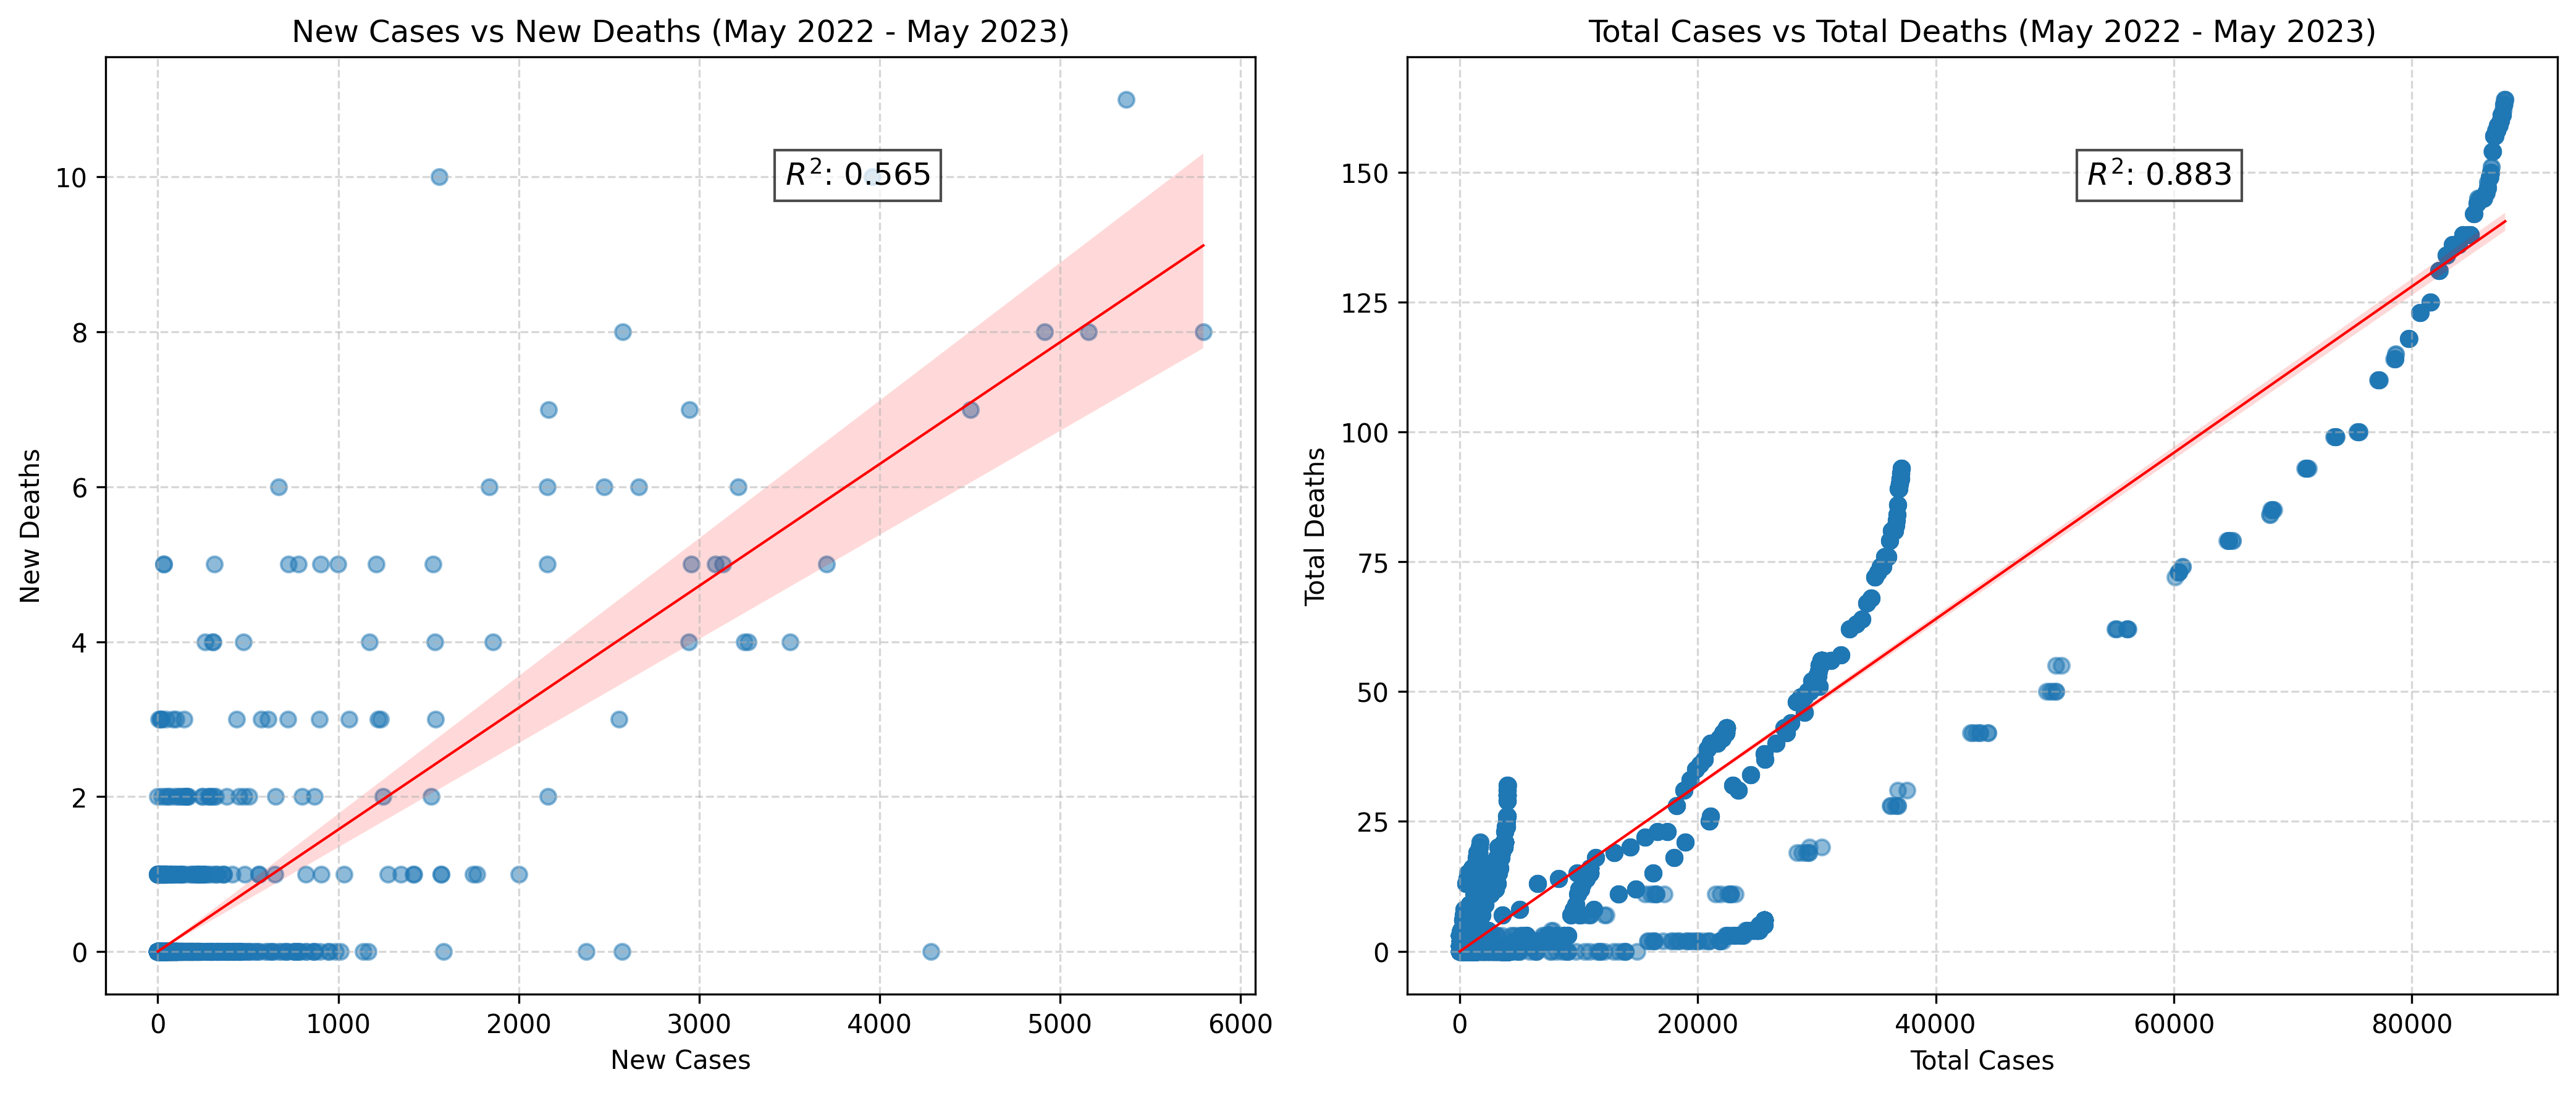

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

# ---- First Plot: New Cases vs New Deaths ----
y1 = df_filtered['new_deaths']
x1 = df_filtered['new_cases']

y1_mean = np.mean(y1)
ss_total1 = np.sum((y1 - y1_mean) ** 2)
ss_residual1 = np.sum((y1 - np.poly1d(np.polyfit(x1, y1, 1))(x1)) ** 2)
r2_1 = 1 - (ss_residual1 / ss_total1)

sns.regplot(data=df_filtered, y='new_deaths', x='new_cases', 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red', 'linewidth': 1}, ax=axes[0])

axes[0].text(x1.max() * 0.6, y1.max() * 0.9, 
             s=f'$R^2$: {r2_1:.3f}', 
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7))

axes[0].set_xlabel("New Cases")
axes[0].set_ylabel("New Deaths")
axes[0].set_title("New Cases vs New Deaths (May 2022 - May 2023)")
axes[0].grid(True, linestyle='--', alpha=0.5)


# ---- Second Plot: Total Cases vs Total Deaths ----
y2 = df_filtered['total_deaths']
x2 = df_filtered['total_cases']

y2_mean = np.mean(y2)
ss_total2 = np.sum((y2 - y2_mean) ** 2)
ss_residual2 = np.sum((y2 - np.poly1d(np.polyfit(x2, y2, 1))(x2)) ** 2)
r2_2 = 1 - (ss_residual2 / ss_total2)

sns.regplot(data=df_filtered, y='total_deaths', x='total_cases', 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red', 'linewidth': 1}, ax=axes[1])

axes[1].text(x2.max() * 0.6, y2.max() * 0.9, 
             s=f'$R^2$: {r2_2:.3f}', 
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7))

axes[1].set_xlabel("Total Cases")
axes[1].set_ylabel("Total Deaths")
axes[1].set_title("Total Cases vs Total Deaths (May 2022 - May 2023)")
axes[1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


a. ax[0]
- R squared (0.565) - only 56% of the variation in new deaths is caused by the new cases. Other factors (e.g., healthcare interventions, vaccination rates, regional differences) likely influence the number of deaths beyond just the new case count.  More scatter around the regression line means:Some countries may have high cases but low deaths due to effective healthcare. Some may have lower cases but higher deaths due to poor medical response.

b. ax[1]
- R squared is higher (0.883), the spread is tighter, meaning total deaths are more predictably linked to total cases.
This suggests long-term trends are more stable, whereas daily variations in new cases and deaths are less predictable.

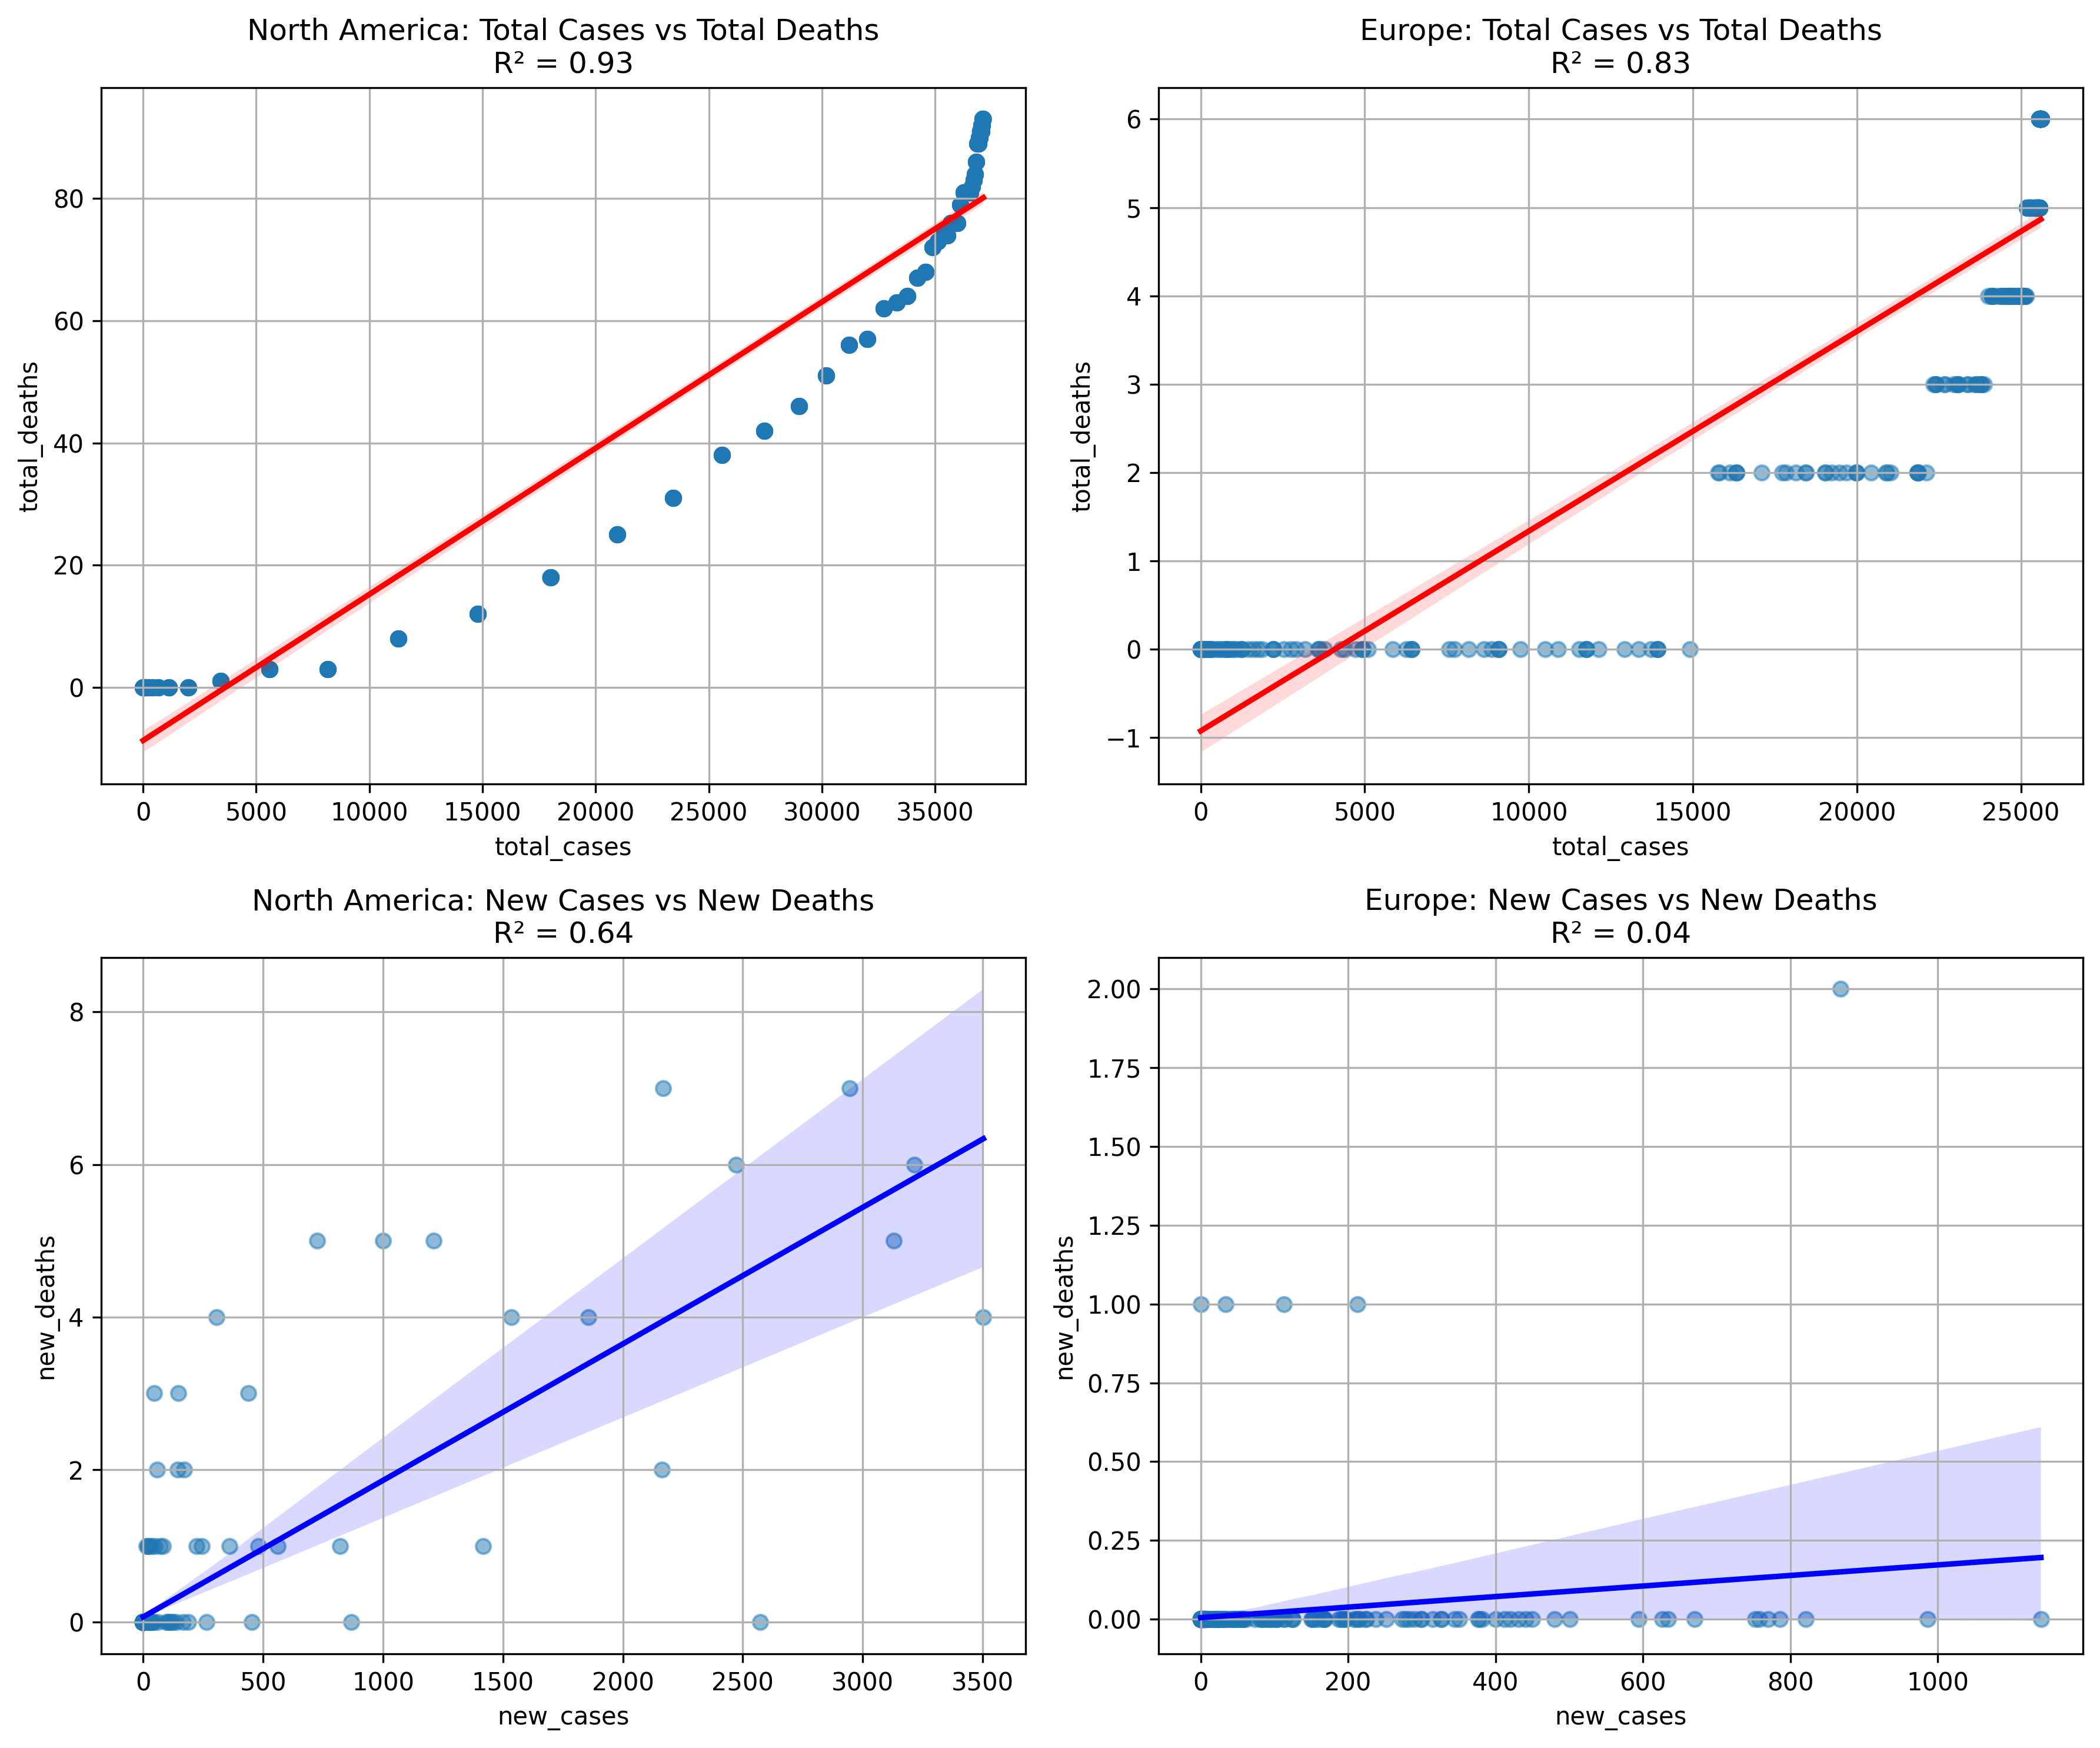

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Filter data
df_north_america = df_filtered[df_filtered['location'] == 'North America']
df_europe = df_filtered[df_filtered['location'] == 'Europe']

# Function to compute R²
def compute_r2(x, y):
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    return r2_score(y, y_pred)

# Compute R² for North America
r2_na_cases_deaths = compute_r2(df_north_america['total_cases'], df_north_america['total_deaths'])
r2_na_new_cases_deaths = compute_r2(df_north_america['new_cases'], df_north_america['new_deaths'])

# Compute R² for Europe
r2_eu_cases_deaths = compute_r2(df_europe['total_cases'], df_europe['total_deaths'])
r2_eu_new_cases_deaths = compute_r2(df_europe['new_cases'], df_europe['new_deaths'])

# Plot scatter plots with regression lines
fig, ax = plt.subplots(2, 2, figsize=(12, 10), dpi=300)

# Total Cases vs Total Deaths
sns.regplot(x='total_cases', y='total_deaths', data=df_north_america, ax=ax[0, 0], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
ax[0, 0].set_title(f'North America: Total Cases vs Total Deaths\nR² = {r2_na_cases_deaths:.2f}')

sns.regplot(x='total_cases', y='total_deaths', data=df_europe, ax=ax[0, 1], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
ax[0, 1].set_title(f'Europe: Total Cases vs Total Deaths\nR² = {r2_eu_cases_deaths:.2f}')

# New Cases vs New Deaths
sns.regplot(x='new_cases', y='new_deaths', data=df_north_america, ax=ax[1, 0], scatter_kws={'alpha':0.5}, line_kws={"color": "blue"})
ax[1, 0].set_title(f'North America: New Cases vs New Deaths\nR² = {r2_na_new_cases_deaths:.2f}')

sns.regplot(x='new_cases', y='new_deaths', data=df_europe, ax=ax[1, 1], scatter_kws={'alpha':0.5}, line_kws={"color": "blue"})
ax[1, 1].set_title(f'Europe: New Cases vs New Deaths\nR² = {r2_eu_new_cases_deaths:.2f}')
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()
plt.tight_layout()
plt.show()


In [ ]:
Qualitative analysis

In [ ]:
Vaccination, stock piling
travelling
Government funding
Health Infrastructure


In [ ]:
df_filtered.columns

Index(['location', 'date', 'iso_code', 'total_cases', 'total_deaths',
       'new_cases', 'new_deaths', 'new_cases_smoothed', 'new_deaths_smoothed',
       'new_cases_per_million', 'total_cases_per_million',
       'new_cases_smoothed_per_million', 'new_deaths_per_million',
       'total_deaths_per_million', 'new_deaths_smoothed_per_million',
       'suspected_cases_cumulative', 'annotation'],
      dtype='object')